In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wordcloud
!pip install stanza
!pip install zemberek-python
!pip install jpype1
!pip install pyspellchecker
!pip install nltk

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 586.9/586.9 kB 23.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 112.4/112.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95.1/95.1 MB 20.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141214 sha256=b896c38ac1e0feeb8b84b6e3453ac4671b6c29a5b89cc797ea2485f14b32ad39
  Stored in directory: /root/.cache/pip/wheels/a7/20/bd/e1477d664f22d99989fd28ee1a43d6633dddb5cb9e801350d5
Successfully built antlr4-python

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import stanza
from spellchecker import SpellChecker
from nltk.corpus import words
import zemberek
from zemberek.morphology import TurkishMorphology
from zemberek.tokenization import TurkishTokenizer
from zemberek.normalization import TurkishSpellChecker
from zemberek.normalization import  TurkishSentenceNormalizer
from zemberek.morphology.analysis.single_analysis import SingleAnalysis
import jpype
import jpype.imports
from jpype.types import JString

# READ DATA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TwitterProje/data/tweets.csv')
#df = pd.read_csv('../data/tweets.csv')
df.head()

Date                                              Tweet
0  08.02.2023  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...
1  08.02.2023  Allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem
2  08.02.2023  Replying to \n@haluklevent\n @danlabilic\n and...
3  08.02.2023       Tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem
4  08.02.2023  ARKADA≈ûIMIZA ULA≈ûAMIYORUZ\nKahramanmara≈ü Elbis...

# CHECK DATA

In [ ]:
def checkData(data):
    print("****************SHAPE****************")
    print(data.shape)
    print("****************COLUMNS****************")
    print(data.columns)
    print("****************DTYPES****************")
    print(data.dtypes)
    print("****************HEAD****************")
    print(data.head())
    print("****************Tail****************")
    print(data.tail())
    print("****************NA****************")
    print(data.isnull().sum())
    print("****************INFO****************")
    print(data.info())

checkData(df)

****************SHAPE****************
(945070, 2)
****************COLUMNS****************
Index(['Date', 'Tweet'], dtype='object')
****************DTYPES****************
Date     object
Tweet    object
dtype: object
****************HEAD****************
         Date                                              Tweet
0  08.02.2023  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...
1  08.02.2023  Allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem
2  08.02.2023  Replying to \n@haluklevent\n @danlabilic\n and...
3  08.02.2023       Tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem
4  08.02.2023  ARKADA≈ûIMIZA ULA≈ûAMIYORUZ\nKahramanmara≈ü Elbis...
****************Tail****************
              Date                                              Tweet
945065  10.02.2023  HALA UMUT VAR BELKƒ∞ RT YAPTIK BELKƒ∞ YAPMADIK A...
945066  10.02.2023  Can can deyu s√∂ylerlerdi‚Ä¶Ben can nedir ≈üimdi b...
945067  10.02.2023  Deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...
945068  10.02.2023

# Drop Duplicate & Nan

In [ ]:
df = df.drop_duplicates(subset=["Tweet"], keep="first").reset_index(drop=True)
df = df.dropna(subset=["Tweet"]).reset_index(drop=True)
checkData(df)

****************SHAPE****************
(875904, 2)
****************COLUMNS****************
Index(['Date', 'Tweet'], dtype='object')
****************DTYPES****************
Date     object
Tweet    object
dtype: object
****************HEAD****************
         Date                                              Tweet
0  08.02.2023  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...
1  08.02.2023  Allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem
2  08.02.2023  Replying to \n@haluklevent\n @danlabilic\n and...
3  08.02.2023       Tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem
4  08.02.2023  ARKADA≈ûIMIZA ULA≈ûAMIYORUZ\nKahramanmara≈ü Elbis...
****************Tail****************
              Date                                              Tweet
875899  10.02.2023     OBƒ∞LET DEPREM B√ñLGELERƒ∞NDEN √úCRETSƒ∞Z TAHLƒ∞Y...
875900  10.02.2023  Anne ve 6 Aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...
875901  10.02.2023  Can can deyu s√∂ylerlerdi‚Ä¶Ben can nedir ≈üimdi b...
875902  10.02.2023

# Tweets Lower And Conver Str

In [ ]:
df['Tweet'] = df['Tweet'].astype(str)
df['Tweet'] = df['Tweet'].str.lower()

In [ ]:
df['lower'] = df['Tweet'].astype(str).str.lower()
df[['Tweet','lower']]

Tweet  \
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n@haluklevent\n @danlabilic\n and...   
3            tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                                    lower  
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...  
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem  
2       replying to \n@haluklevent\n @danlabilic\n and...  
3            tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem  
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...  
...                                                   ...  
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...  
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...  
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...  
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...  
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...  

[875904 rows x 2 columns]

# Count By Tweet Date

In [ ]:
tweet_counts = df.groupby('Date')['Tweet'].count().sort_values(ascending=False)
print("=== Tweet Counts by Date ===")
print(tweet_counts)

=== Tweet Counts by Date ===
Date
06.02.2023    465560
07.02.2023    196001
08.02.2023     97372
09.02.2023     71622
10.02.2023     45349
Name: Tweet, dtype: int64


# Hashtags

In [ ]:
hashtag_counts = df['Tweet'].str.findall(r'#\w+').explode().value_counts()
print("=== Hashtag Counts ===")
print(hashtag_counts)

=== Hashtag Counts ===
Tweet
#deprem                 2509
#hatay                   400
#hatayyardimbekliyor     194
#depremsondakika         185
#afad                    164
                        ... 
#bursa                     1
#g√∂kberkdemirci            1
#erdbeben                  1
#helpturkiye               1
#o                         1
Name: count, Length: 836, dtype: int64


# Word Cloud Hashtags

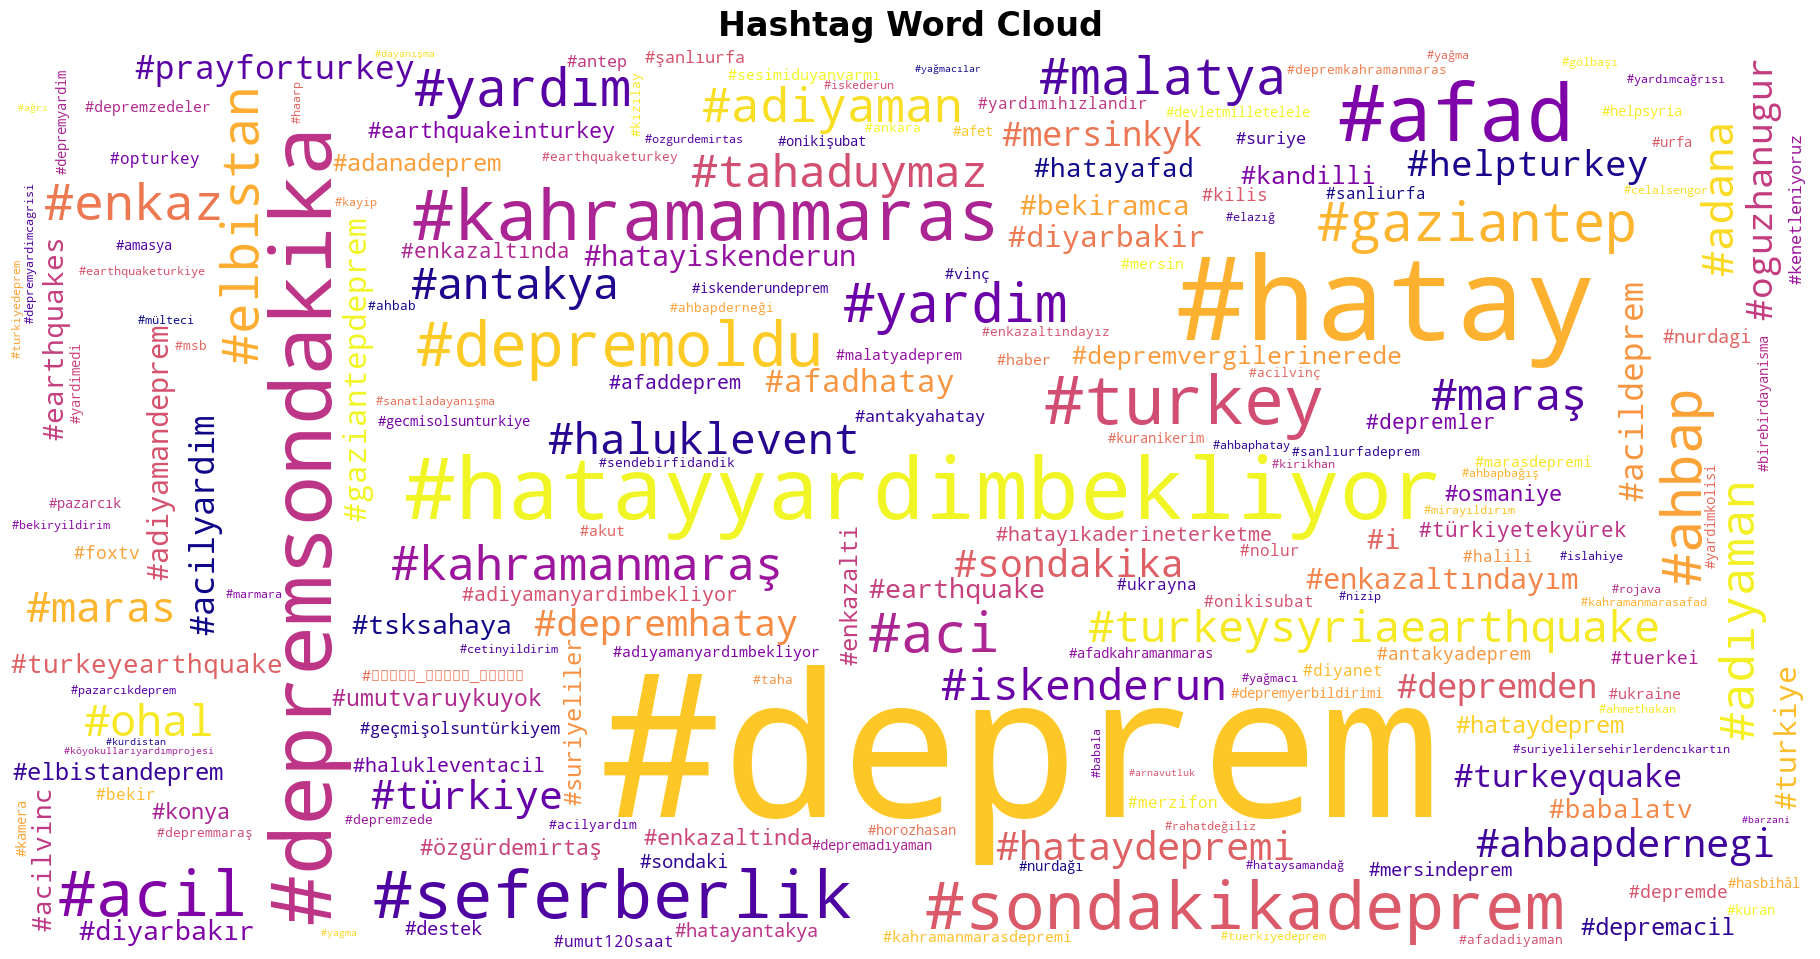

In [ ]:
hashtag_dict = hashtag_counts.to_dict()
wordcloud = WordCloud(
    width=1800,
    height=900,
    background_color='white',
    min_font_size=10,
    max_font_size=200,
    colormap='plasma',
    contour_color='steelblue',
    contour_width=1.5
).generate_from_frequencies(hashtag_dict)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud', fontsize=24, fontweight='bold', pad=10)
plt.tight_layout(pad=0)
plt.show()

# Remove @ mentions and hyperlinks

In [ ]:
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9]+', '', text)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    return text

df['content_ment_link'] = df['Tweet'].apply(lambda x: remove_mentions(x))
df['content_ment_link'] = df['content_ment_link'].apply(lambda x: remove_urls(x))
df.head()

Date                                              Tweet  \
0  08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3  08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                               lower  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...  
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem  
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...  
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem  
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...

In [ ]:
df

Date                                              Tweet  \
0       08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3       08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...            ...                                                ...   
875899  10.02.2023     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  10.02.2023  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  10.02.2023  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  10.02.2023  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  10.02.2023  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                                    lower  \
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n@haluklevent\n @danlabilic\n and...   
3            tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                        content_ment_link  
0       \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...  
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem  
2       replying to \n\n \n and \n_harun\nadƒ±yamanda a...  
3                   tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem  
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...  
...                                                   ...  
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...  
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...  
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...  
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...  
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...  

[875904 rows x 4 columns]

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,535 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,539 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,557 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,560 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,575 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,577 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,590 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,594 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,607 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-12-05 19:40:04,610 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

## Removal of Punctuations

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['content_wo_punct'] = df['content_ment_link'].apply(lambda x: remove_punctuation(x))
df['content_wo_punct'] = df['content_wo_punct'].str.replace('\n', ' ', regex=False)
df

Date                                              Tweet  \
0       08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3       08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...            ...                                                ...   
875899  10.02.2023     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  10.02.2023  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  10.02.2023  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  10.02.2023  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  10.02.2023  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                                    lower  \
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n@haluklevent\n @danlabilic\n and...   
3            tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                        content_ment_link  \
0       \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3                   tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                         content_wo_punct  
0            hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...  
1        allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem  
2       replying to      and  harun adƒ±yamanda ali ta≈ü...  
3                      tuƒüba s√∂dekoƒülu kovulsun    deprem  
4       arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...  
...                                                   ...  
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...  
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...  
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...  
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k yaƒümacƒ±lƒ±k yapan...  
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...  

[875904 rows x 5 columns]

## Remove Emojies & Numbers

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\u231A-\u231B"
        u"\u23E9-\u23EC"
        u"\u25FD-\u25FE"
        u"\u2614-\u2615"
        u"\u2648-\u2653"
        u"\u26AA-\u26AB"
        u"\u26BD-\u26BE"
        u"\u26C4-\u26C5"
        u"\u26F2-\u26F3"
        u"\u270A-\u270B"
        u"\u2753-\u2755"
        u"\u2795-\u2797"
        u"\u2B1B-\u2B1C"
        u"\U0001F191-\U0001F19A"
        u"\U0001F232-\U0001F236"
        u"\U0001F238-\U0001F23A"
        u"\U0001F250-\U0001F251"
        u"\U0001F300-\U0001F30C"
        u"\U0001F30D-\U0001F30E"
        u"\U0001F313-\U0001F315"
        u"\U0001F316-\U0001F318"
        u"\U0001F31D-\U0001F31E"
        u"\U0001F31F-\U0001F320"
        u"\U0001F32D-\U0001F32F"
        u"\U0001F330-\U0001F331"
        u"\U0001F332-\U0001F333"
        u"\U0001F334-\U0001F335"
        u"\U0001F337-\U0001F34A"
        u"\U0001F34C-\U0001F34F"
        u"\U0001F351-\U0001F37B"
        u"\U0001F37E-\U0001F37F"
        u"\U0001F380-\U0001F393"
        u"\U0001F3A0-\U0001F3C4"
        u"\U0001F3CF-\U0001F3D3"
        u"\U0001F3E0-\U0001F3E3"
        u"\U0001F3E5-\U0001F3F0"
        u"\U0001F3F8-\U0001F407"
        u"\U0001F409-\U0001F40B"
        u"\U0001F40C-\U0001F40E"
        u"\U0001F40F-\U0001F410"
        u"\U0001F411-\U0001F412"
        u"\U0001F417-\U0001F429"
        u"\U0001F42B-\U0001F43E"
        u"\U0001F442-\U0001F464"
        u"\U0001F466-\U0001F46B"
        u"\U0001F46C-\U0001F46D"
        u"\U0001F46E-\U0001F4AC"
        u"\U0001F4AE-\U0001F4B5"
        u"\U0001F4B6-\U0001F4B7"
        u"\U0001F4B8-\U0001F4EB"
        u"\U0001F4EC-\U0001F4ED"
        u"\U0001F4F0-\U0001F4F4"
        u"\U0001F4F6-\U0001F4F7"
        u"\U0001F4F9-\U0001F4FC"
        u"\U0001F4FF-\U0001F502"
        u"\U0001F504-\U0001F507"
        u"\U0001F50A-\U0001F514"
        u"\U0001F516-\U0001F52B"
        u"\U0001F52C-\U0001F52D"
        u"\U0001F52E-\U0001F53D"
        u"\U0001F54B-\U0001F54E"
        u"\U0001F550-\U0001F55B"
        u"\U0001F55C-\U0001F567"
        u"\U0001F595-\U0001F596"
        u"\U0001F5FB-\U0001F5FF"
        u"\U0001F601-\U0001F606"
        u"\U0001F607-\U0001F608"
        u"\U0001F609-\U0001F60D"
        u"\U0001F612-\U0001F614"
        u"\U0001F61C-\U0001F61E"
        u"\U0001F620-\U0001F625"
        u"\U0001F626-\U0001F627"
        u"\U0001F628-\U0001F62B"
        u"\U0001F62E-\U0001F62F"
        u"\U0001F630-\U0001F633"
        u"\U0001F637-\U0001F640"
        u"\U0001F641-\U0001F644"
        u"\U0001F645-\U0001F64F"
        u"\U0001F681-\U0001F682"
        u"\U0001F683-\U0001F685"
        u"\U0001F68A-\U0001F68B"
        u"\U0001F691-\U0001F693"
        u"\U0001F699-\U0001F69A"
        u"\U0001F69B-\U0001F6A1"
        u"\U0001F6A4-\U0001F6A5"
        u"\U0001F6A7-\U0001F6AD"
        u"\U0001F6AE-\U0001F6B1"
        u"\U0001F6B3-\U0001F6B5"
        u"\U0001F6B7-\U0001F6B8"
        u"\U0001F6B9-\U0001F6BE"
        u"\U0001F6C1-\U0001F6C5"
        u"\U0001F6D1-\U0001F6D2"
        u"\U0001F6D6-\U0001F6D7"
        u"\U0001F6DD-\U0001F6DF"
        u"\U0001F6EB-\U0001F6EC"
        u"\U0001F6F4-\U0001F6F6"
        u"\U0001F6F7-\U0001F6F8"
        u"\U0001F6FB-\U0001F6FC"
        u"\U0001F7E0-\U0001F7EB"
        u"\U0001F90D-\U0001F90F"
        u"\U0001F910-\U0001F918"
        u"\U0001F919-\U0001F91E"
        u"\U0001F920-\U0001F927"
        u"\U0001F928-\U0001F92F"
        u"\U0001F931-\U0001F932"
        u"\U0001F933-\U0001F93A"
        u"\U0001F93C-\U0001F93E"
        u"\U0001F940-\U0001F945"
        u"\U0001F947-\U0001F94B"
        u"\U0001F94D-\U0001F94F"
        u"\U0001F950-\U0001F95E"
        u"\U0001F95F-\U0001F96B"
        u"\U0001F96C-\U0001F970"
        u"\U0001F973-\U0001F976"
        u"\U0001F977-\U0001F978"
        u"\U0001F97C-\U0001F97F"
        u"\U0001F980-\U0001F984"
        u"\U0001F985-\U0001F991"
        u"\U0001F992-\U0001F997"
        u"\U0001F998-\U0001F9A2"
        u"\U0001F9A3-\U0001F9A4"
        u"\U0001F9A5-\U0001F9AA"
        u"\U0001F9AB-\U0001F9AD"
        u"\U0001F9AE-\U0001F9AF"
        u"\U0001F9B0-\U0001F9B9"
        u"\U0001F9BA-\U0001F9BF"
        u"\U0001F9C1-\U0001F9C2"
        u"\U0001F9C3-\U0001F9CA"
        u"\U0001F9CD-\U0001F9CF"
        u"\U0001F9D0-\U0001F9E6"
        u"\U0001F9E7-\U0001F9FF"
        u"\U0001FA70-\U0001FA73"
        u"\U0001FA78-\U0001FA7A"
        u"\U0001FA7B-\U0001FA7C"
        u"\U0001FA80-\U0001FA82"
        u"\U0001FA83-\U0001FA86"
        u"\U0001FA90-\U0001FA95"
        u"\U0001FA96-\U0001FAA8"
        u"\U0001FAA9-\U0001FAAC"
        u"\U0001FAB0-\U0001FAB6"
        u"\U0001FAB7-\U0001FABA"
        u"\U0001FAC0-\U0001FAC2"
        u"\U0001FAC3-\U0001FAC5"
        u"\U0001FAD0-\U0001FAD6"
        u"\U0001FAD7-\U0001FAD9"
        u"\U0001FAE0-\U0001FAE7"
        u"\U0001FAF0-\U0001FAF6"
        u"\u23F0"
        u"\u23F3"
        u"\u267F"
        u"\u2693"
        u"\u26A1"
        u"\u26CE"
        u"\u26D4"
        u"\u26EA"
        u"\u26F5"
        u"\u26FA"
        u"\u26FD"
        u"\u2705"
        u"\u2728"
        u"\u274C"
        u"\u274E"
        u"\u2757"
        u"\u27B0"
        u"\u27BF"
        u"\u2B50"
        u"\u2B55"
        u"\U0001F004"
        u"\U0001F0CF"
        u"\U0001F18E"
        u"\U0001F201"
        u"\U0001F21A"
        u"\U0001F22F"
        u"\U0001F30F"
        u"\U0001F310"
        u"\U0001F311"
        u"\U0001F312"
        u"\U0001F319"
        u"\U0001F31A"
        u"\U0001F31B"
        u"\U0001F31C"
        u"\U0001F34B"
        u"\U0001F350"
        u"\U0001F37C"
        u"\U0001F3C5"
        u"\U0001F3C6"
        u"\U0001F3C7"
        u"\U0001F3C8"
        u"\U0001F3C9"
        u"\U0001F3CA"
        u"\U0001F3E4"
        u"\U0001F3F4"
        u"\U0001F408"
        u"\U0001F413"
        u"\U0001F414"
        u"\U0001F415"
        u"\U0001F416"
        u"\U0001F42A"
        u"\U0001F440"
        u"\U0001F465"
        u"\U0001F4AD"
        u"\U0001F4EE"
        u"\U0001F4EF"
        u"\U0001F4F5"
        u"\U0001F4F8"
        u"\U0001F503"
        u"\U0001F508"
        u"\U0001F509"
        u"\U0001F515"
        u"\U0001F57A"
        u"\U0001F5A4"
        u"\U0001F600"
        u"\U0001F60E"
        u"\U0001F60F"
        u"\U0001F610"
        u"\U0001F611"
        u"\U0001F615"
        u"\U0001F616"
        u"\U0001F617"
        u"\U0001F618"
        u"\U0001F619"
        u"\U0001F61A"
        u"\U0001F61B"
        u"\U0001F61F"
        u"\U0001F62C"
        u"\U0001F62D"
        u"\U0001F634"
        u"\U0001F635"
        u"\U0001F636"
        u"\U0001F680"
        u"\U0001F686"
        u"\U0001F687"
        u"\U0001F688"
        u"\U0001F689"
        u"\U0001F68C"
        u"\U0001F68D"
        u"\U0001F68E"
        u"\U0001F68F"
        u"\U0001F690"
        u"\U0001F694"
        u"\U0001F695"
        u"\U0001F696"
        u"\U0001F697"
        u"\U0001F698"
        u"\U0001F6A2"
        u"\U0001F6A3"
        u"\U0001F6A6"
        u"\U0001F6B2"
        u"\U0001F6B6"
        u"\U0001F6BF"
        u"\U0001F6C0"
        u"\U0001F6CC"
        u"\U0001F6D0"
        u"\U0001F6D5"
        u"\U0001F6F9"
        u"\U0001F6FA"
        u"\U0001F7F0"
        u"\U0001F90C"
        u"\U0001F91F"
        u"\U0001F930"
        u"\U0001F93F"
        u"\U0001F94C"
        u"\U0001F971"
        u"\U0001F972"
        u"\U0001F979"
        u"\U0001F97A"
        u"\U0001F97B"
        u"\U0001F9C0"
        u"\U0001F9CB"
        u"\U0001F9CC"
        u"\U0001FA74"
        u"\u00A9"
        u"\uFE0F"
        u"\u00AE"
        u"\uFE0F"
        u"\u203C"
        u"\uFE0F"
        u"\u2049"
        u"\uFE0F"
        u"\u2122"
        u"\uFE0F"
        u"\u2139"
        u"\uFE0F"
        u"\u2194"
        u"\uFE0F"
        u"\u2195"
        u"\uFE0F"
        u"\u2196"
        u"\uFE0F"
        u"\u2197"
        u"\uFE0F"
        u"\u2198"
        u"\uFE0F"
        u"\u2199"
        u"\uFE0F"
        u"\u21A9"
        u"\uFE0F"
        u"\u21AA"
        u"\uFE0F"
        u"\u2328"
        u"\uFE0F"
        u"\u23CF"
        u"\uFE0F"
        u"\u23ED"
        u"\uFE0F"
        u"\u23EE"
        u"\uFE0F"
        u"\u23EF"
        u"\uFE0F"
        u"\u23F1"
        u"\uFE0F"
        u"\u23F2"
        u"\uFE0F"
        u"\u23F8"
        u"\uFE0F"
        u"\u23F9"
        u"\uFE0F"
        u"\u23FA"
        u"\uFE0F"
        u"\u24C2"
        u"\uFE0F"
        u"\u25AA"
        u"\uFE0F"
        u"\u25AB"
        u"\uFE0F"
        u"\u25B6"
        u"\uFE0F"
        u"\u25C0"
        u"\uFE0F"
        u"\u25FB"
        u"\uFE0F"
        u"\u25FC"
        u"\uFE0F"
        u"\u2600"
        u"\uFE0F"
        u"\u2601"
        u"\uFE0F"
        u"\u2602"
        u"\uFE0F"
        u"\u2603"
        u"\uFE0F"
        u"\u2604"
        u"\uFE0F"
        u"\u260E"
        u"\uFE0F"
        u"\u2611"
        u"\uFE0F"
        u"\u2618"
        u"\uFE0F"
        u"\u261D"
        u"\uFE0F"
        u"\u2620"
        u"\uFE0F"
        u"\u2622"
        u"\uFE0F"
        u"\u2623"
        u"\uFE0F"
        u"\u2626"
        u"\uFE0F"
        u"\u262A"
        u"\uFE0F"
        u"\u262E"
        u"\uFE0F"
        u"\u262F"
        u"\uFE0F"
        u"\u2638"
        u"\uFE0F"
        u"\u2639"
        u"\uFE0F"
        u"\u263A"
        u"\uFE0F"
        u"\u2640"
        u"\uFE0F"
        u"\u2642"
        u"\uFE0F"
        u"\u265F"
        u"\uFE0F"
        u"\u2660"
        u"\uFE0F"
        u"\u2663"
        u"\uFE0F"
        u"\u2665"
        u"\uFE0F"
        u"\u2666"
        u"\uFE0F"
        u"\u2668"
        u"\uFE0F"
        u"\u267B"
        u"\uFE0F"
        u"\u267E"
        u"\uFE0F"
        u"\u2692"
        u"\uFE0F"
        u"\u2694"
        u"\uFE0F"
        u"\u2695"
        u"\uFE0F"
        u"\u2696"
        u"\uFE0F"
        u"\u2697"
        u"\uFE0F"
        u"\u2699"
        u"\uFE0F"
        u"\u269B"
        u"\uFE0F"
        u"\u269C"
        u"\uFE0F"
        u"\u26A0"
        u"\uFE0F"
        u"\u26A7"
        u"\uFE0F"
        u"\u26B0"
        u"\uFE0F"
        u"\u26B1"
        u"\uFE0F"
        u"\u26C8"
        u"\uFE0F"
        u"\u26CF"
        u"\uFE0F"
        u"\u26D1"
        u"\uFE0F"
        u"\u26D3"
        u"\uFE0F"
        u"\u26E9"
        u"\uFE0F"
        u"\u26F0"
        u"\uFE0F"
        u"\u26F1"
        u"\uFE0F"
        u"\u26F4"
        u"\uFE0F"
        u"\u26F7"
        u"\uFE0F"
        u"\u26F8"
        u"\uFE0F"
        u"\u26F9"
        u"\uFE0F"
        u"\u2702"
        u"\uFE0F"
        u"\u2708"
        u"\uFE0F"
        u"\u2709"
        u"\uFE0F"
        u"\u270C"
        u"\uFE0F"
        u"\u270D"
        u"\uFE0F"
        u"\u270F"
        u"\uFE0F"
        u"\u2712"
        u"\uFE0F"
        u"\u2714"
        u"\uFE0F"
        u"\u2716"
        u"\uFE0F"
        u"\u271D"
        u"\uFE0F"
        u"\u2721"
        u"\uFE0F"
        u"\u2733"
        u"\uFE0F"
        u"\u2734"
        u"\uFE0F"
        u"\u2744"
        u"\uFE0F"
        u"\u2747"
        u"\uFE0F"
        u"\u2763"
        u"\uFE0F"
        u"\u2764"
        u"\uFE0F"
        u"\u27A1"
        u"\uFE0F"
        u"\u2934"
        u"\uFE0F"
        u"\u2935"
        u"\uFE0F"
        u"\u2B05"
        u"\uFE0F"
        u"\u2B06"
        u"\uFE0F"
        u"\u2B07"
        u"\uFE0F"
        u"\u3030"
        u"\uFE0F"
        u"\u303D"
        u"\uFE0F"
        u"\u3297"
        u"\uFE0F"
        u"\u3299"
        u"\uFE0F"
        u"\U0001F170"
        u"\uFE0F"
        u"\U0001F171"
        u"\uFE0F"
        u"\U0001F17E"
        u"\uFE0F"
        u"\U0001F17F"
        u"\uFE0F"
        u"\U0001F202"
        u"\uFE0F"
        u"\U0001F237"
        u"\uFE0F"
        u"\U0001F321"
        u"\uFE0F"
        u"\U0001F324"
        u"\uFE0F"
        u"\U0001F325"
        u"\uFE0F"
        u"\U0001F326"
        u"\uFE0F"
        u"\U0001F327"
        u"\uFE0F"
        u"\U0001F328"
        u"\uFE0F"
        u"\U0001F329"
        u"\uFE0F"
        u"\U0001F32A"
        u"\uFE0F"
        u"\U0001F32B"
        u"\uFE0F"
        u"\U0001F32C"
        u"\uFE0F"
        u"\U0001F336"
        u"\uFE0F"
        u"\U0001F37D"
        u"\uFE0F"
        u"\U0001F396"
        u"\uFE0F"
        u"\U0001F397"
        u"\uFE0F"
        u"\U0001F399"
        u"\uFE0F"
        u"\U0001F39A"
        u"\uFE0F"
        u"\U0001F39B"
        u"\uFE0F"
        u"\U0001F39E"
        u"\uFE0F"
        u"\U0001F39F"
        u"\uFE0F"
        u"\U0001F3CB"
        u"\uFE0F"
        u"\U0001F3CC"
        u"\uFE0F"
        u"\U0001F3CD"
        u"\uFE0F"
        u"\U0001F3CE"
        u"\uFE0F"
        u"\U0001F3D4"
        u"\uFE0F"
        u"\U0001F3D5"
        u"\uFE0F"
        u"\U0001F3D6"
        u"\uFE0F"
        u"\U0001F3D7"
        u"\uFE0F"
        u"\U0001F3D8"
        u"\uFE0F"
        u"\U0001F3D9"
        u"\uFE0F"
        u"\U0001F3DA"
        u"\uFE0F"
        u"\U0001F3DB"
        u"\uFE0F"
        u"\U0001F3DC"
        u"\uFE0F"
        u"\U0001F3DD"
        u"\uFE0F"
        u"\U0001F3DE"
        u"\uFE0F"
        u"\U0001F3DF"
        u"\uFE0F"
        u"\U0001F3F3"
        u"\uFE0F"
        u"\U0001F3F5"
        u"\uFE0F"
        u"\U0001F3F7"
        u"\uFE0F"
        u"\U0001F43F"
        u"\uFE0F"
        u"\U0001F441"
        u"\uFE0F"
        u"\U0001F4FD"
        u"\uFE0F"
        u"\U0001F549"
        u"\uFE0F"
        u"\U0001F54A"
        u"\uFE0F"
        u"\U0001F56F"
        u"\uFE0F"
        u"\U0001F570"
        u"\uFE0F"
        u"\U0001F573"
        u"\uFE0F"
        u"\U0001F574"
        u"\uFE0F"
        u"\U0001F575"
        u"\uFE0F"
        u"\U0001F576"
        u"\uFE0F"
        u"\U0001F577"
        u"\uFE0F"
        u"\U0001F578"
        u"\uFE0F"
        u"\U0001F579"
        u"\uFE0F"
        u"\U0001F587"
        u"\uFE0F"
        u"\U0001F58A"
        u"\uFE0F"
        u"\U0001F58B"
        u"\uFE0F"
        u"\U0001F58C"
        u"\uFE0F"
        u"\U0001F58D"
        u"\uFE0F"
        u"\U0001F590"
        u"\uFE0F"
        u"\U0001F5A5"
        u"\uFE0F"
        u"\U0001F5A8"
        u"\uFE0F"
        u"\U0001F5B1"
        u"\uFE0F"
        u"\U0001F5B2"
        u"\uFE0F"
        u"\U0001F5BC"
        u"\uFE0F"
        u"\U0001F5C2"
        u"\uFE0F"
        u"\U0001F5C3"
        u"\uFE0F"
        u"\U0001F5C4"
        u"\uFE0F"
        u"\U0001F5D1"
        u"\uFE0F"
        u"\U0001F5D2"
        u"\uFE0F"
        u"\U0001F5D3"
        u"\uFE0F"
        u"\U0001F5DC"
        u"\uFE0F"
        u"\U0001F5DD"
        u"\uFE0F"
        u"\U0001F5DE"
        u"\uFE0F"
        u"\U0001F5E1"
        u"\uFE0F"
        u"\U0001F5E3"
        u"\uFE0F"
        u"\U0001F5E8"
        u"\uFE0F"
        u"\U0001F5EF"
        u"\uFE0F"
        u"\U0001F5F3"
        u"\uFE0F"
        u"\U0001F5FA"
        u"\uFE0F"
        u"\U0001F6CB"
        u"\uFE0F"
        u"\U0001F6CD"
        u"\uFE0F"
        u"\U0001F6CE"
        u"\uFE0F"
        u"\U0001F6CF"
        u"\uFE0F"
        u"\U0001F6E0"
        u"\uFE0F"
        u"\U0001F6E1"
        u"\uFE0F"
        u"\U0001F6E2"
        u"\uFE0F"
        u"\U0001F6E3"
        u"\uFE0F"
        u"\U0001F6E4"
        u"\uFE0F"
        u"\U0001F6E5"
        u"\uFE0F"
        u"\U0001F6E9"
        u"\uFE0F"
        u"\U0001F6F0"
        u"\uFE0F"
        u"\U0001F6F3"
        u"\uFE0F"
        u"\u0023"
        u"\uFE0F"
        u"\u20E3"
        u"\u002A"
        u"\uFE0F"
        u"\u20E3"
        u"\u0030"
        u"\uFE0F"
        u"\u20E3"
        u"\u0031"
        u"\uFE0F"
        u"\u20E3"
        u"\u0032"
        u"\uFE0F"
        u"\u20E3"
        u"\u0033"
        u"\uFE0F"
        u"\u20E3"
        u"\u0034"
        u"\uFE0F"
        u"\u20E3"
        u"\u0035"
        u"\uFE0F"
        u"\u20E3"
        u"\u0036"
        u"\uFE0F"
        u"\u20E3"
        u"\u0037"
        u"\uFE0F"
        u"\u20E3"
        u"\u0038"
        u"\uFE0F"
        u"\u20E3"
        u"\u0039"
        u"\uFE0F"
        u"\u20E3"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E9"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EB"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EE"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F4"
        u"\U0001F1E6"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FC"
        u"\U0001F1E6"
        u"\U0001F1FD"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1E7"
        u"\U0001F1E6"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E9"
        u"\U0001F1E7"
        u"\U0001F1EA"
        u"\U0001F1E7"
        u"\U0001F1EB"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1ED"
        u"\U0001F1E7"
        u"\U0001F1EE"
        u"\U0001F1E7"
        u"\U0001F1EF"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F2"
        u"\U0001F1E7"
        u"\U0001F1F3"
        u"\U0001F1E7"
        u"\U0001F1F4"
        u"\U0001F1E7"
        u"\U0001F1F6"
        u"\U0001F1E7"
        u"\U0001F1F7"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F9"
        u"\U0001F1E7"
        u"\U0001F1FB"
        u"\U0001F1E7"
        u"\U0001F1FC"
        u"\U0001F1E7"
        u"\U0001F1FE"
        u"\U0001F1E7"
        u"\U0001F1FF"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E9"
        u"\U0001F1E8"
        u"\U0001F1EB"
        u"\U0001F1E8"
        u"\U0001F1EC"
        u"\U0001F1E8"
        u"\U0001F1ED"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1F0"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F4"
        u"\U0001F1E8"
        u"\U0001F1F5"
        u"\U0001F1E8"
        u"\U0001F1F7"
        u"\U0001F1E8"
        u"\U0001F1FA"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FC"
        u"\U0001F1E8"
        u"\U0001F1FD"
        u"\U0001F1E8"
        u"\U0001F1FE"
        u"\U0001F1E8"
        u"\U0001F1FF"
        u"\U0001F1E9"
        u"\U0001F1EA"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EF"
        u"\U0001F1E9"
        u"\U0001F1F0"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F4"
        u"\U0001F1E9"
        u"\U0001F1FF"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E8"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1ED"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F9"
        u"\U0001F1EA"
        u"\U0001F1FA"
        u"\U0001F1EB"
        u"\U0001F1EE"
        u"\U0001F1EB"
        u"\U0001F1EF"
        u"\U0001F1EB"
        u"\U0001F1F0"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F4"
        u"\U0001F1EB"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EB"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1ED"
        u"\U0001F1EC"
        u"\U0001F1EE"
        u"\U0001F1EC"
        u"\U0001F1F1"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F6"
        u"\U0001F1EC"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FC"
        u"\U0001F1EC"
        u"\U0001F1FE"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F3"
        u"\U0001F1ED"
        u"\U0001F1F7"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1FA"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E9"
        u"\U0001F1EE"
        u"\U0001F1EA"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F2"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F4"
        u"\U0001F1EE"
        u"\U0001F1F6"
        u"\U0001F1EE"
        u"\U0001F1F7"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1EA"
        u"\U0001F1EF"
        u"\U0001F1F2"
        u"\U0001F1EF"
        u"\U0001F1F4"
        u"\U0001F1EF"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1EA"
        u"\U0001F1F0"
        u"\U0001F1EC"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1EE"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F3"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F7"
        u"\U0001F1F0"
        u"\U0001F1FC"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1F0"
        u"\U0001F1FF"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1F0"
        u"\U0001F1F1"
        u"\U0001F1F7"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1FA"
        u"\U0001F1F1"
        u"\U0001F1FB"
        u"\U0001F1F1"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1EA"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F1"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F3"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F6"
        u"\U0001F1F2"
        u"\U0001F1F7"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FB"
        u"\U0001F1F2"
        u"\U0001F1FC"
        u"\U0001F1F2"
        u"\U0001F1FD"
        u"\U0001F1F2"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1F3"
        u"\U0001F1E6"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1EA"
        u"\U0001F1F3"
        u"\U0001F1EB"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1F1"
        u"\U0001F1F3"
        u"\U0001F1F4"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F7"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FF"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1E6"
        u"\U0001F1F5"
        u"\U0001F1EA"
        u"\U0001F1F5"
        u"\U0001F1EB"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1ED"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F1"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F7"
        u"\U0001F1F5"
        u"\U0001F1F8"
        u"\U0001F1F5"
        u"\U0001F1F9"
        u"\U0001F1F5"
        u"\U0001F1FC"
        u"\U0001F1F5"
        u"\U0001F1FE"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1F4"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1FA"
        u"\U0001F1F7"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E8"
        u"\U0001F1F8"
        u"\U0001F1E9"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1ED"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EF"
        u"\U0001F1F8"
        u"\U0001F1F0"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F3"
        u"\U0001F1F8"
        u"\U0001F1F4"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F9"
        u"\U0001F1F8"
        u"\U0001F1FB"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F8"
        u"\U0001F1FE"
        u"\U0001F1F8"
        u"\U0001F1FF"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E8"
        u"\U0001F1F9"
        u"\U0001F1E9"
        u"\U0001F1F9"
        u"\U0001F1EB"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1F9"
        u"\U0001F1F0"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F3"
        u"\U0001F1F9"
        u"\U0001F1F4"
        u"\U0001F1F9"
        u"\U0001F1F7"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1FB"
        u"\U0001F1F9"
        u"\U0001F1FC"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F8"
        u"\U0001F1FA"
        u"\U0001F1FE"
        u"\U0001F1FA"
        u"\U0001F1FF"
        u"\U0001F1FB"
        u"\U0001F1E6"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1EA"
        u"\U0001F1FB"
        u"\U0001F1EC"
        u"\U0001F1FB"
        u"\U0001F1EE"
        u"\U0001F1FB"
        u"\U0001F1F3"
        u"\U0001F1FB"
        u"\U0001F1FA"
        u"\U0001F1FC"
        u"\U0001F1EB"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1EA"
        u"\U0001F1FE"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1FC"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0065"
        u"\U000E006E"
        u"\U000E0067"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0073"
        u"\U000E0063"
        u"\U000E0074"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0077"
        u"\U000E006C"
        u"\U000E0073"
        u"\U000E007F"
        u"\u261D"
        u"\U0001F3FB"
        u"\u261D"
        u"\U0001F3FC"
        u"\u261D"
        u"\U0001F3FD"
        u"\u261D"
        u"\U0001F3FE"
        u"\u261D"
        u"\U0001F3FF"
        u"\u26F9"
        u"\U0001F3FB"
        u"\u26F9"
        u"\U0001F3FC"
        u"\u26F9"
        u"\U0001F3FD"
        u"\u26F9"
        u"\U0001F3FE"
        u"\u26F9"
        u"\U0001F3FF"
        u"\u270A"
        u"\U0001F3FB"
        u"\u270A"
        u"\U0001F3FC"
        u"\u270A"
        u"\U0001F3FD"
        u"\u270A"
        u"\U0001F3FE"
        u"\u270A"
        u"\U0001F3FF"
        u"\u270B"
        u"\U0001F3FB"
        u"\u270B"
        u"\U0001F3FC"
        u"\u270B"
        u"\U0001F3FD"
        u"\u270B"
        u"\U0001F3FE"
        u"\u270B"
        u"\U0001F3FF"
        u"\u270C"
        u"\U0001F3FB"
        u"\u270C"
        u"\U0001F3FC"
        u"\u270C"
        u"\U0001F3FD"
        u"\u270C"
        u"\U0001F3FE"
        u"\u270C"
        u"\U0001F3FF"
        u"\u270D"
        u"\U0001F3FB"
        u"\u270D"
        u"\U0001F3FC"
        u"\u270D"
        u"\U0001F3FD"
        u"\u270D"
        u"\U0001F3FE"
        u"\u270D"
        u"\U0001F3FF"
        u"\U0001F385"
        u"\U0001F3FB"
        u"\U0001F385"
        u"\U0001F3FC"
        u"\U0001F385"
        u"\U0001F3FD"
        u"\U0001F385"
        u"\U0001F3FE"
        u"\U0001F385"
        u"\U0001F3FF"
        u"\U0001F3C2"
        u"\U0001F3FB"
        u"\U0001F3C2"
        u"\U0001F3FC"
        u"\U0001F3C2"
        u"\U0001F3FD"
        u"\U0001F3C2"
        u"\U0001F3FE"
        u"\U0001F3C2"
        u"\U0001F3FF"
        u"\U0001F3C3"
        u"\U0001F3FB"
        u"\U0001F3C3"
        u"\U0001F3FC"
        u"\U0001F3C3"
        u"\U0001F3FD"
        u"\U0001F3C3"
        u"\U0001F3FE"
        u"\U0001F3C3"
        u"\U0001F3FF"
        u"\U0001F3C4"
        u"\U0001F3FB"
        u"\U0001F3C4"
        u"\U0001F3FC"
        u"\U0001F3C4"
        u"\U0001F3FD"
        u"\U0001F3C4"
        u"\U0001F3FE"
        u"\U0001F3C4"
        u"\U0001F3FF"
        u"\U0001F3C7"
        u"\U0001F3FB"
        u"\U0001F3C7"
        u"\U0001F3FC"
        u"\U0001F3C7"
        u"\U0001F3FD"
        u"\U0001F3C7"
        u"\U0001F3FE"
        u"\U0001F3C7"
        u"\U0001F3FF"
        u"\U0001F3CA"
        u"\U0001F3FB"
        u"\U0001F3CA"
        u"\U0001F3FC"
        u"\U0001F3CA"
        u"\U0001F3FD"
        u"\U0001F3CA"
        u"\U0001F3FE"
        u"\U0001F3CA"
        u"\U0001F3FF"
        u"\U0001F3CB"
        u"\U0001F3FB"
        u"\U0001F3CB"
        u"\U0001F3FC"
        u"\U0001F3CB"
        u"\U0001F3FD"
        u"\U0001F3CB"
        u"\U0001F3FE"
        u"\U0001F3CB"
        u"\U0001F3FF"
        u"\U0001F3CC"
        u"\U0001F3FB"
        u"\U0001F3CC"
        u"\U0001F3FC"
        u"\U0001F3CC"
        u"\U0001F3FD"
        u"\U0001F3CC"
        u"\U0001F3FE"
        u"\U0001F3CC"
        u"\U0001F3FF"
        u"\U0001F442"
        u"\U0001F3FB"
        u"\U0001F442"
        u"\U0001F3FC"
        u"\U0001F442"
        u"\U0001F3FD"
        u"\U0001F442"
        u"\U0001F3FE"
        u"\U0001F442"
        u"\U0001F3FF"
        u"\U0001F443"
        u"\U0001F3FB"
        u"\U0001F443"
        u"\U0001F3FC"
        u"\U0001F443"
        u"\U0001F3FD"
        u"\U0001F443"
        u"\U0001F3FE"
        u"\U0001F443"
        u"\U0001F3FF"
        u"\U0001F446"
        u"\U0001F3FB"
        u"\U0001F446"
        u"\U0001F3FC"
        u"\U0001F446"
        u"\U0001F3FD"
        u"\U0001F446"
        u"\U0001F3FE"
        u"\U0001F446"
        u"\U0001F3FF"
        u"\U0001F447"
        u"\U0001F3FB"
        u"\U0001F447"
        u"\U0001F3FC"
        u"\U0001F447"
        u"\U0001F3FD"
        u"\U0001F447"
        u"\U0001F3FE"
        u"\U0001F447"
        u"\U0001F3FF"
        u"\U0001F448"
        u"\U0001F3FB"
        u"\U0001F448"
        u"\U0001F3FC"
        u"\U0001F448"
        u"\U0001F3FD"
        u"\U0001F448"
        u"\U0001F3FE"
        u"\U0001F448"
        u"\U0001F3FF"
        u"\U0001F449"
        u"\U0001F3FB"
        u"\U0001F449"
        u"\U0001F3FC"
        u"\U0001F449"
        u"\U0001F3FD"
        u"\U0001F449"
        u"\U0001F3FE"
        u"\U0001F449"
        u"\U0001F3FF"
        u"\U0001F44A"
        u"\U0001F3FB"
        u"\U0001F44A"
        u"\U0001F3FC"
        u"\U0001F44A"
        u"\U0001F3FD"
        u"\U0001F44A"
        u"\U0001F3FE"
        u"\U0001F44A"
        u"\U0001F3FF"
        u"\U0001F44B"
        u"\U0001F3FB"
        u"\U0001F44B"
        u"\U0001F3FC"
        u"\U0001F44B"
        u"\U0001F3FD"
        u"\U0001F44B"
        u"\U0001F3FE"
        u"\U0001F44B"
        u"\U0001F3FF"
        u"\U0001F44C"
        u"\U0001F3FB"
        u"\U0001F44C"
        u"\U0001F3FC"
        u"\U0001F44C"
        u"\U0001F3FD"
        u"\U0001F44C"
        u"\U0001F3FE"
        u"\U0001F44C"
        u"\U0001F3FF"
        u"\U0001F44D"
        u"\U0001F3FB"
        u"\U0001F44D"
        u"\U0001F3FC"
        u"\U0001F44D"
        u"\U0001F3FD"
        u"\U0001F44D"
        u"\U0001F3FE"
        u"\U0001F44D"
        u"\U0001F3FF"
        u"\U0001F44E"
        u"\U0001F3FB"
        u"\U0001F44E"
        u"\U0001F3FC"
        u"\U0001F44E"
        u"\U0001F3FD"
        u"\U0001F44E"
        u"\U0001F3FE"
        u"\U0001F44E"
        u"\U0001F3FF"
        u"\U0001F44F"
        u"\U0001F3FB"
        u"\U0001F44F"
        u"\U0001F3FC"
        u"\U0001F44F"
        u"\U0001F3FD"
        u"\U0001F44F"
        u"\U0001F3FE"
        u"\U0001F44F"
        u"\U0001F3FF"
        u"\U0001F450"
        u"\U0001F3FB"
        u"\U0001F450"
        u"\U0001F3FC"
        u"\U0001F450"
        u"\U0001F3FD"
        u"\U0001F450"
        u"\U0001F3FE"
        u"\U0001F450"
        u"\U0001F3FF"
        u"\U0001F466"
        u"\U0001F3FB"
        u"\U0001F466"
        u"\U0001F3FC"
        u"\U0001F466"
        u"\U0001F3FD"
        u"\U0001F466"
        u"\U0001F3FE"
        u"\U0001F466"
        u"\U0001F3FF"
        u"\U0001F467"
        u"\U0001F3FB"
        u"\U0001F467"
        u"\U0001F3FC"
        u"\U0001F467"
        u"\U0001F3FD"
        u"\U0001F467"
        u"\U0001F3FE"
        u"\U0001F467"
        u"\U0001F3FF"
        u"\U0001F468"
        u"\U0001F3FB"
        u"\U0001F468"
        u"\U0001F3FC"
        u"\U0001F468"
        u"\U0001F3FD"
        u"\U0001F468"
        u"\U0001F3FE"
        u"\U0001F468"
        u"\U0001F3FF"
        u"\U0001F469"
        u"\U0001F3FB"
        u"\U0001F469"
        u"\U0001F3FC"
        u"\U0001F469"
        u"\U0001F3FD"
        u"\U0001F469"
        u"\U0001F3FE"
        u"\U0001F469"
        u"\U0001F3FF"
        u"\U0001F46B"
        u"\U0001F3FB"
        u"\U0001F46B"
        u"\U0001F3FC"
        u"\U0001F46B"
        u"\U0001F3FD"
        u"\U0001F46B"
        u"\U0001F3FE"
        u"\U0001F46B"
        u"\U0001F3FF"
        u"\U0001F46C"
        u"\U0001F3FB"
        u"\U0001F46C"
        u"\U0001F3FC"
        u"\U0001F46C"
        u"\U0001F3FD"
        u"\U0001F46C"
        u"\U0001F3FE"
        u"\U0001F46C"
        u"\U0001F3FF"
        u"\U0001F46D"
        u"\U0001F3FB"
        u"\U0001F46D"
        u"\U0001F3FC"
        u"\U0001F46D"
        u"\U0001F3FD"
        u"\U0001F46D"
        u"\U0001F3FE"
        u"\U0001F46D"
        u"\U0001F3FF"
        u"\U0001F46E"
        u"\U0001F3FB"
        u"\U0001F46E"
        u"\U0001F3FC"
        u"\U0001F46E"
        u"\U0001F3FD"
        u"\U0001F46E"
        u"\U0001F3FE"
        u"\U0001F46E"
        u"\U0001F3FF"
        u"\U0001F470"
        u"\U0001F3FB"
        u"\U0001F470"
        u"\U0001F3FC"
        u"\U0001F470"
        u"\U0001F3FD"
        u"\U0001F470"
        u"\U0001F3FE"
        u"\U0001F470"
        u"\U0001F3FF"
        u"\U0001F471"
        u"\U0001F3FB"
        u"\U0001F471"
        u"\U0001F3FC"
        u"\U0001F471"
        u"\U0001F3FD"
        u"\U0001F471"
        u"\U0001F3FE"
        u"\U0001F471"
        u"\U0001F3FF"
        u"\U0001F472"
        u"\U0001F3FB"
        u"\U0001F472"
        u"\U0001F3FC"
        u"\U0001F472"
        u"\U0001F3FD"
        u"\U0001F472"
        u"\U0001F3FE"
        u"\U0001F472"
        u"\U0001F3FF"
        u"\U0001F473"
        u"\U0001F3FB"
        u"\U0001F473"
        u"\U0001F3FC"
        u"\U0001F473"
        u"\U0001F3FD"
        u"\U0001F473"
        u"\U0001F3FE"
        u"\U0001F473"
        u"\U0001F3FF"
        u"\U0001F474"
        u"\U0001F3FB"
        u"\U0001F474"
        u"\U0001F3FC"
        u"\U0001F474"
        u"\U0001F3FD"
        u"\U0001F474"
        u"\U0001F3FE"
        u"\U0001F474"
        u"\U0001F3FF"
        u"\U0001F475"
        u"\U0001F3FB"
        u"\U0001F475"
        u"\U0001F3FC"
        u"\U0001F475"
        u"\U0001F3FD"
        u"\U0001F475"
        u"\U0001F3FE"
        u"\U0001F475"
        u"\U0001F3FF"
        u"\U0001F476"
        u"\U0001F3FB"
        u"\U0001F476"
        u"\U0001F3FC"
        u"\U0001F476"
        u"\U0001F3FD"
        u"\U0001F476"
        u"\U0001F3FE"
        u"\U0001F476"
        u"\U0001F3FF"
        u"\U0001F477"
        u"\U0001F3FB"
        u"\U0001F477"
        u"\U0001F3FC"
        u"\U0001F477"
        u"\U0001F3FD"
        u"\U0001F477"
        u"\U0001F3FE"
        u"\U0001F477"
        u"\U0001F3FF"
        u"\U0001F478"
        u"\U0001F3FB"
        u"\U0001F478"
        u"\U0001F3FC"
        u"\U0001F478"
        u"\U0001F3FD"
        u"\U0001F478"
        u"\U0001F3FE"
        u"\U0001F478"
        u"\U0001F3FF"
        u"\U0001F47C"
        u"\U0001F3FB"
        u"\U0001F47C"
        u"\U0001F3FC"
        u"\U0001F47C"
        u"\U0001F3FD"
        u"\U0001F47C"
        u"\U0001F3FE"
        u"\U0001F47C"
        u"\U0001F3FF"
        u"\U0001F481"
        u"\U0001F3FB"
        u"\U0001F481"
        u"\U0001F3FC"
        u"\U0001F481"
        u"\U0001F3FD"
        u"\U0001F481"
        u"\U0001F3FE"
        u"\U0001F481"
        u"\U0001F3FF"
        u"\U0001F482"
        u"\U0001F3FB"
        u"\U0001F482"
        u"\U0001F3FC"
        u"\U0001F482"
        u"\U0001F3FD"
        u"\U0001F482"
        u"\U0001F3FE"
        u"\U0001F482"
        u"\U0001F3FF"
        u"\U0001F483"
        u"\U0001F3FB"
        u"\U0001F483"
        u"\U0001F3FC"
        u"\U0001F483"
        u"\U0001F3FD"
        u"\U0001F483"
        u"\U0001F3FE"
        u"\U0001F483"
        u"\U0001F3FF"
        u"\U0001F485"
        u"\U0001F3FB"
        u"\U0001F485"
        u"\U0001F3FC"
        u"\U0001F485"
        u"\U0001F3FD"
        u"\U0001F485"
        u"\U0001F3FE"
        u"\U0001F485"
        u"\U0001F3FF"
        u"\U0001F486"
        u"\U0001F3FB"
        u"\U0001F486"
        u"\U0001F3FC"
        u"\U0001F486"
        u"\U0001F3FD"
        u"\U0001F486"
        u"\U0001F3FE"
        u"\U0001F486"
        u"\U0001F3FF"
        u"\U0001F487"
        u"\U0001F3FB"
        u"\U0001F487"
        u"\U0001F3FC"
        u"\U0001F487"
        u"\U0001F3FD"
        u"\U0001F487"
        u"\U0001F3FE"
        u"\U0001F487"
        u"\U0001F3FF"
        u"\U0001F48F"
        u"\U0001F3FB"
        u"\U0001F48F"
        u"\U0001F3FC"
        u"\U0001F48F"
        u"\U0001F3FD"
        u"\U0001F48F"
        u"\U0001F3FE"
        u"\U0001F48F"
        u"\U0001F3FF"
        u"\U0001F491"
        u"\U0001F3FB"
        u"\U0001F491"
        u"\U0001F3FC"
        u"\U0001F491"
        u"\U0001F3FD"
        u"\U0001F491"
        u"\U0001F3FE"
        u"\U0001F491"
        u"\U0001F3FF"
        u"\U0001F4AA"
        u"\U0001F3FB"
        u"\U0001F4AA"
        u"\U0001F3FC"
        u"\U0001F4AA"
        u"\U0001F3FD"
        u"\U0001F4AA"
        u"\U0001F3FE"
        u"\U0001F4AA"
        u"\U0001F3FF"
        u"\U0001F574"
        u"\U0001F3FB"
        u"\U0001F574"
        u"\U0001F3FC"
        u"\U0001F574"
        u"\U0001F3FD"
        u"\U0001F574"
        u"\U0001F3FE"
        u"\U0001F574"
        u"\U0001F3FF"
        u"\U0001F575"
        u"\U0001F3FB"
        u"\U0001F575"
        u"\U0001F3FC"
        u"\U0001F575"
        u"\U0001F3FD"
        u"\U0001F575"
        u"\U0001F3FE"
        u"\U0001F575"
        u"\U0001F3FF"
        u"\U0001F57A"
        u"\U0001F3FB"
        u"\U0001F57A"
        u"\U0001F3FC"
        u"\U0001F57A"
        u"\U0001F3FD"
        u"\U0001F57A"
        u"\U0001F3FE"
        u"\U0001F57A"
        u"\U0001F3FF"
        u"\U0001F590"
        u"\U0001F3FB"
        u"\U0001F590"
        u"\U0001F3FC"
        u"\U0001F590"
        u"\U0001F3FD"
        u"\U0001F590"
        u"\U0001F3FE"
        u"\U0001F590"
        u"\U0001F3FF"
        u"\U0001F595"
        u"\U0001F3FB"
        u"\U0001F595"
        u"\U0001F3FC"
        u"\U0001F595"
        u"\U0001F3FD"
        u"\U0001F595"
        u"\U0001F3FE"
        u"\U0001F595"
        u"\U0001F3FF"
        u"\U0001F596"
        u"\U0001F3FB"
        u"\U0001F596"
        u"\U0001F3FC"
        u"\U0001F596"
        u"\U0001F3FD"
        u"\U0001F596"
        u"\U0001F3FE"
        u"\U0001F596"
        u"\U0001F3FF"
        u"\U0001F645"
        u"\U0001F3FB"
        u"\U0001F645"
        u"\U0001F3FC"
        u"\U0001F645"
        u"\U0001F3FD"
        u"\U0001F645"
        u"\U0001F3FE"
        u"\U0001F645"
        u"\U0001F3FF"
        u"\U0001F646"
        u"\U0001F3FB"
        u"\U0001F646"
        u"\U0001F3FC"
        u"\U0001F646"
        u"\U0001F3FD"
        u"\U0001F646"
        u"\U0001F3FE"
        u"\U0001F646"
        u"\U0001F3FF"
        u"\U0001F647"
        u"\U0001F3FB"
        u"\U0001F647"
        u"\U0001F3FC"
        u"\U0001F647"
        u"\U0001F3FD"
        u"\U0001F647"
        u"\U0001F3FE"
        u"\U0001F647"
        u"\U0001F3FF"
        u"\U0001F64B"
        u"\U0001F3FB"
        u"\U0001F64B"
        u"\U0001F3FC"
        u"\U0001F64B"
        u"\U0001F3FD"
        u"\U0001F64B"
        u"\U0001F3FE"
        u"\U0001F64B"
        u"\U0001F3FF"
        u"\U0001F64C"
        u"\U0001F3FB"
        u"\U0001F64C"
        u"\U0001F3FC"
        u"\U0001F64C"
        u"\U0001F3FD"
        u"\U0001F64C"
        u"\U0001F3FE"
        u"\U0001F64C"
        u"\U0001F3FF"
        u"\U0001F64D"
        u"\U0001F3FB"
        u"\U0001F64D"
        u"\U0001F3FC"
        u"\U0001F64D"
        u"\U0001F3FD"
        u"\U0001F64D"
        u"\U0001F3FE"
        u"\U0001F64D"
        u"\U0001F3FF"
        u"\U0001F64E"
        u"\U0001F3FB"
        u"\U0001F64E"
        u"\U0001F3FC"
        u"\U0001F64E"
        u"\U0001F3FD"
        u"\U0001F64E"
        u"\U0001F3FE"
        u"\U0001F64E"
        u"\U0001F3FF"
        u"\U0001F64F"
        u"\U0001F3FB"
        u"\U0001F64F"
        u"\U0001F3FC"
        u"\U0001F64F"
        u"\U0001F3FD"
        u"\U0001F64F"
        u"\U0001F3FE"
        u"\U0001F64F"
        u"\U0001F3FF"
        u"\U0001F6A3"
        u"\U0001F3FB"
        u"\U0001F6A3"
        u"\U0001F3FC"
        u"\U0001F6A3"
        u"\U0001F3FD"
        u"\U0001F6A3"
        u"\U0001F3FE"
        u"\U0001F6A3"
        u"\U0001F3FF"
        u"\U0001F6B4"
        u"\U0001F3FB"
        u"\U0001F6B4"
        u"\U0001F3FC"
        u"\U0001F6B4"
        u"\U0001F3FD"
        u"\U0001F6B4"
        u"\U0001F3FE"
        u"\U0001F6B4"
        u"\U0001F3FF"
        u"\U0001F6B5"
        u"\U0001F3FB"
        u"\U0001F6B5"
        u"\U0001F3FC"
        u"\U0001F6B5"
        u"\U0001F3FD"
        u"\U0001F6B5"
        u"\U0001F3FE"
        u"\U0001F6B5"
        u"\U0001F3FF"
        u"\U0001F6B6"
        u"\U0001F3FB"
        u"\U0001F6B6"
        u"\U0001F3FC"
        u"\U0001F6B6"
        u"\U0001F3FD"
        u"\U0001F6B6"
        u"\U0001F3FE"
        u"\U0001F6B6"
        u"\U0001F3FF"
        u"\U0001F6C0"
        u"\U0001F3FB"
        u"\U0001F6C0"
        u"\U0001F3FC"
        u"\U0001F6C0"
        u"\U0001F3FD"
        u"\U0001F6C0"
        u"\U0001F3FE"
        u"\U0001F6C0"
        u"\U0001F3FF"
        u"\U0001F6CC"
        u"\U0001F3FB"
        u"\U0001F6CC"
        u"\U0001F3FC"
        u"\U0001F6CC"
        u"\U0001F3FD"
        u"\U0001F6CC"
        u"\U0001F3FE"
        u"\U0001F6CC"
        u"\U0001F3FF"
        u"\U0001F90C"
        u"\U0001F3FB"
        u"\U0001F90C"
        u"\U0001F3FC"
        u"\U0001F90C"
        u"\U0001F3FD"
        u"\U0001F90C"
        u"\U0001F3FE"
        u"\U0001F90C"
        u"\U0001F3FF"
        u"\U0001F90F"
        u"\U0001F3FB"
        u"\U0001F90F"
        u"\U0001F3FC"
        u"\U0001F90F"
        u"\U0001F3FD"
        u"\U0001F90F"
        u"\U0001F3FE"
        u"\U0001F90F"
        u"\U0001F3FF"
        u"\U0001F918"
        u"\U0001F3FB"
        u"\U0001F918"
        u"\U0001F3FC"
        u"\U0001F918"
        u"\U0001F3FD"
        u"\U0001F918"
        u"\U0001F3FE"
        u"\U0001F918"
        u"\U0001F3FF"
        u"\U0001F919"
        u"\U0001F3FB"
        u"\U0001F919"
        u"\U0001F3FC"
        u"\U0001F919"
        u"\U0001F3FD"
        u"\U0001F919"
        u"\U0001F3FE"
        u"\U0001F919"
        u"\U0001F3FF"
        u"\U0001F91A"
        u"\U0001F3FB"
        u"\U0001F91A"
        u"\U0001F3FC"
        u"\U0001F91A"
        u"\U0001F3FD"
        u"\U0001F91A"
        u"\U0001F3FE"
        u"\U0001F91A"
        u"\U0001F3FF"
        u"\U0001F91B"
        u"\U0001F3FB"
        u"\U0001F91B"
        u"\U0001F3FC"
        u"\U0001F91B"
        u"\U0001F3FD"
        u"\U0001F91B"
        u"\U0001F3FE"
        u"\U0001F91B"
        u"\U0001F3FF"
        u"\U0001F91C"
        u"\U0001F3FB"
        u"\U0001F91C"
        u"\U0001F3FC"
        u"\U0001F91C"
        u"\U0001F3FD"
        u"\U0001F91C"
        u"\U0001F3FE"
        u"\U0001F91C"
        u"\U0001F3FF"
        u"\U0001F91D"
        u"\U0001F3FB"
        u"\U0001F91D"
        u"\U0001F3FC"
        u"\U0001F91D"
        u"\U0001F3FD"
        u"\U0001F91D"
        u"\U0001F3FE"
        u"\U0001F91D"
        u"\U0001F3FF"
        u"\U0001F91E"
        u"\U0001F3FB"
        u"\U0001F91E"
        u"\U0001F3FC"
        u"\U0001F91E"
        u"\U0001F3FD"
        u"\U0001F91E"
        u"\U0001F3FE"
        u"\U0001F91E"
        u"\U0001F3FF"
        u"\U0001F91F"
        u"\U0001F3FB"
        u"\U0001F91F"
        u"\U0001F3FC"
        u"\U0001F91F"
        u"\U0001F3FD"
        u"\U0001F91F"
        u"\U0001F3FE"
        u"\U0001F91F"
        u"\U0001F3FF"
        u"\U0001F926"
        u"\U0001F3FB"
        u"\U0001F926"
        u"\U0001F3FC"
        u"\U0001F926"
        u"\U0001F3FD"
        u"\U0001F926"
        u"\U0001F3FE"
        u"\U0001F926"
        u"\U0001F3FF"
        u"\U0001F930"
        u"\U0001F3FB"
        u"\U0001F930"
        u"\U0001F3FC"
        u"\U0001F930"
        u"\U0001F3FD"
        u"\U0001F930"
        u"\U0001F3FE"
        u"\U0001F930"
        u"\U0001F3FF"
        u"\U0001F931"
        u"\U0001F3FB"
        u"\U0001F931"
        u"\U0001F3FC"
        u"\U0001F931"
        u"\U0001F3FD"
        u"\U0001F931"
        u"\U0001F3FE"
        u"\U0001F931"
        u"\U0001F3FF"
        u"\U0001F932"
        u"\U0001F3FB"
        u"\U0001F932"
        u"\U0001F3FC"
        u"\U0001F932"
        u"\U0001F3FD"
        u"\U0001F932"
        u"\U0001F3FE"
        u"\U0001F932"
        u"\U0001F3FF"
        u"\U0001F933"
        u"\U0001F3FB"
        u"\U0001F933"
        u"\U0001F3FC"
        u"\U0001F933"
        u"\U0001F3FD"
        u"\U0001F933"
        u"\U0001F3FE"
        u"\U0001F933"
        u"\U0001F3FF"
        u"\U0001F934"
        u"\U0001F3FB"
        u"\U0001F934"
        u"\U0001F3FC"
        u"\U0001F934"
        u"\U0001F3FD"
        u"\U0001F934"
        u"\U0001F3FE"
        u"\U0001F934"
        u"\U0001F3FF"
        u"\U0001F935"
        u"\U0001F3FB"
        u"\U0001F935"
        u"\U0001F3FC"
        u"\U0001F935"
        u"\U0001F3FD"
        u"\U0001F935"
        u"\U0001F3FE"
        u"\U0001F935"
        u"\U0001F3FF"
        u"\U0001F936"
        u"\U0001F3FB"
        u"\U0001F936"
        u"\U0001F3FC"
        u"\U0001F936"
        u"\U0001F3FD"
        u"\U0001F936"
        u"\U0001F3FE"
        u"\U0001F936"
        u"\U0001F3FF"
        u"\U0001F937"
        u"\U0001F3FB"
        u"\U0001F937"
        u"\U0001F3FC"
        u"\U0001F937"
        u"\U0001F3FD"
        u"\U0001F937"
        u"\U0001F3FE"
        u"\U0001F937"
        u"\U0001F3FF"
        u"\U0001F938"
        u"\U0001F3FB"
        u"\U0001F938"
        u"\U0001F3FC"
        u"\U0001F938"
        u"\U0001F3FD"
        u"\U0001F938"
        u"\U0001F3FE"
        u"\U0001F938"
        u"\U0001F3FF"
        u"\U0001F939"
        u"\U0001F3FB"
        u"\U0001F939"
        u"\U0001F3FC"
        u"\U0001F939"
        u"\U0001F3FD"
        u"\U0001F939"
        u"\U0001F3FE"
        u"\U0001F939"
        u"\U0001F3FF"
        u"\U0001F93D"
        u"\U0001F3FB"
        u"\U0001F93D"
        u"\U0001F3FC"
        u"\U0001F93D"
        u"\U0001F3FD"
        u"\U0001F93D"
        u"\U0001F3FE"
        u"\U0001F93D"
        u"\U0001F3FF"
        u"\U0001F93E"
        u"\U0001F3FB"
        u"\U0001F93E"
        u"\U0001F3FC"
        u"\U0001F93E"
        u"\U0001F3FD"
        u"\U0001F93E"
        u"\U0001F3FE"
        u"\U0001F93E"
        u"\U0001F3FF"
        u"\U0001F977"
        u"\U0001F3FB"
        u"\U0001F977"
        u"\U0001F3FC"
        u"\U0001F977"
        u"\U0001F3FD"
        u"\U0001F977"
        u"\U0001F3FE"
        u"\U0001F977"
        u"\U0001F3FF"
        u"\U0001F9B5"
        u"\U0001F3FB"
        u"\U0001F9B5"
        u"\U0001F3FC"
        u"\U0001F9B5"
        u"\U0001F3FD"
        u"\U0001F9B5"
        u"\U0001F3FE"
        u"\U0001F9B5"
        u"\U0001F3FF"
        u"\U0001F9B6"
        u"\U0001F3FB"
        u"\U0001F9B6"
        u"\U0001F3FC"
        u"\U0001F9B6"
        u"\U0001F3FD"
        u"\U0001F9B6"
        u"\U0001F3FE"
        u"\U0001F9B6"
        u"\U0001F3FF"
        u"\U0001F9B8"
        u"\U0001F3FB"
        u"\U0001F9B8"
        u"\U0001F3FC"
        u"\U0001F9B8"
        u"\U0001F3FD"
        u"\U0001F9B8"
        u"\U0001F3FE"
        u"\U0001F9B8"
        u"\U0001F3FF"
        u"\U0001F9B9"
        u"\U0001F3FB"
        u"\U0001F9B9"
        u"\U0001F3FC"
        u"\U0001F9B9"
        u"\U0001F3FD"
        u"\U0001F9B9"
        u"\U0001F3FE"
        u"\U0001F9B9"
        u"\U0001F3FF"
        u"\U0001F9BB"
        u"\U0001F3FB"
        u"\U0001F9BB"
        u"\U0001F3FC"
        u"\U0001F9BB"
        u"\U0001F3FD"
        u"\U0001F9BB"
        u"\U0001F3FE"
        u"\U0001F9BB"
        u"\U0001F3FF"
        u"\U0001F9CD"
        u"\U0001F3FB"
        u"\U0001F9CD"
        u"\U0001F3FC"
        u"\U0001F9CD"
        u"\U0001F3FD"
        u"\U0001F9CD"
        u"\U0001F3FE"
        u"\U0001F9CD"
        u"\U0001F3FF"
        u"\U0001F9CE"
        u"\U0001F3FB"
        u"\U0001F9CE"
        u"\U0001F3FC"
        u"\U0001F9CE"
        u"\U0001F3FD"
        u"\U0001F9CE"
        u"\U0001F3FE"
        u"\U0001F9CE"
        u"\U0001F3FF"
        u"\U0001F9CF"
        u"\U0001F3FB"
        u"\U0001F9CF"
        u"\U0001F3FC"
        u"\U0001F9CF"
        u"\U0001F3FD"
        u"\U0001F9CF"
        u"\U0001F3FE"
        u"\U0001F9CF"
        u"\U0001F3FF"
        u"\U0001F9D1"
        u"\U0001F3FB"
        u"\U0001F9D1"
        u"\U0001F3FC"
        u"\U0001F9D1"
        u"\U0001F3FD"
        u"\U0001F9D1"
        u"\U0001F3FE"
        u"\U0001F9D1"
        u"\U0001F3FF"
        u"\U0001F9D2"
        u"\U0001F3FB"
        u"\U0001F9D2"
        u"\U0001F3FC"
        u"\U0001F9D2"
        u"\U0001F3FD"
        u"\U0001F9D2"
        u"\U0001F3FE"
        u"\U0001F9D2"
        u"\U0001F3FF"
        u"\U0001F9D3"
        u"\U0001F3FB"
        u"\U0001F9D3"
        u"\U0001F3FC"
        u"\U0001F9D3"
        u"\U0001F3FD"
        u"\U0001F9D3"
        u"\U0001F3FE"
        u"\U0001F9D3"
        u"\U0001F3FF"
        u"\U0001F9D4"
        u"\U0001F3FB"
        u"\U0001F9D4"
        u"\U0001F3FC"
        u"\U0001F9D4"
        u"\U0001F3FD"
        u"\U0001F9D4"
        u"\U0001F3FE"
        u"\U0001F9D4"
        u"\U0001F3FF"
        u"\U0001F9D5"
        u"\U0001F3FB"
        u"\U0001F9D5"
        u"\U0001F3FC"
        u"\U0001F9D5"
        u"\U0001F3FD"
        u"\U0001F9D5"
        u"\U0001F3FE"
        u"\U0001F9D5"
        u"\U0001F3FF"
        u"\U0001F9D6"
        u"\U0001F3FB"
        u"\U0001F9D6"
        u"\U0001F3FC"
        u"\U0001F9D6"
        u"\U0001F3FD"
        u"\U0001F9D6"
        u"\U0001F3FE"
        u"\U0001F9D6"
        u"\U0001F3FF"
        u"\U0001F9D7"
        u"\U0001F3FB"
        u"\U0001F9D7"
        u"\U0001F3FC"
        u"\U0001F9D7"
        u"\U0001F3FD"
        u"\U0001F9D7"
        u"\U0001F3FE"
        u"\U0001F9D7"
        u"\U0001F3FF"
        u"\U0001F9D8"
        u"\U0001F3FB"
        u"\U0001F9D8"
        u"\U0001F3FC"
        u"\U0001F9D8"
        u"\U0001F3FD"
        u"\U0001F9D8"
        u"\U0001F3FE"
        u"\U0001F9D8"
        u"\U0001F3FF"
        u"\U0001F9D9"
        u"\U0001F3FB"
        u"\U0001F9D9"
        u"\U0001F3FC"
        u"\U0001F9D9"
        u"\U0001F3FD"
        u"\U0001F9D9"
        u"\U0001F3FE"
        u"\U0001F9D9"
        u"\U0001F3FF"
        u"\U0001F9DA"
        u"\U0001F3FB"
        u"\U0001F9DA"
        u"\U0001F3FC"
        u"\U0001F9DA"
        u"\U0001F3FD"
        u"\U0001F9DA"
        u"\U0001F3FE"
        u"\U0001F9DA"
        u"\U0001F3FF"
        u"\U0001F9DB"
        u"\U0001F3FB"
        u"\U0001F9DB"
        u"\U0001F3FC"
        u"\U0001F9DB"
        u"\U0001F3FD"
        u"\U0001F9DB"
        u"\U0001F3FE"
        u"\U0001F9DB"
        u"\U0001F3FF"
        u"\U0001F9DC"
        u"\U0001F3FB"
        u"\U0001F9DC"
        u"\U0001F3FC"
        u"\U0001F9DC"
        u"\U0001F3FD"
        u"\U0001F9DC"
        u"\U0001F3FE"
        u"\U0001F9DC"
        u"\U0001F3FF"
        u"\U0001F9DD"
        u"\U0001F3FB"
        u"\U0001F9DD"
        u"\U0001F3FC"
        u"\U0001F9DD"
        u"\U0001F3FD"
        u"\U0001F9DD"
        u"\U0001F3FE"
        u"\U0001F9DD"
        u"\U0001F3FF"
        u"\U0001FAC3"
        u"\U0001F3FB"
        u"\U0001FAC3"
        u"\U0001F3FC"
        u"\U0001FAC3"
        u"\U0001F3FD"
        u"\U0001FAC3"
        u"\U0001F3FE"
        u"\U0001FAC3"
        u"\U0001F3FF"
        u"\U0001FAC4"
        u"\U0001F3FB"
        u"\U0001FAC4"
        u"\U0001F3FC"
        u"\U0001FAC4"
        u"\U0001F3FD"
        u"\U0001FAC4"
        u"\U0001F3FE"
        u"\U0001FAC4"
        u"\U0001F3FF"
        u"\U0001FAC5"
        u"\U0001F3FB"
        u"\U0001FAC5"
        u"\U0001F3FC"
        u"\U0001FAC5"
        u"\U0001F3FD"
        u"\U0001FAC5"
        u"\U0001F3FE"
        u"\U0001FAC5"
        u"\U0001F3FF"
        u"\U0001FAF0"
        u"\U0001F3FB"
        u"\U0001FAF0"
        u"\U0001F3FC"
        u"\U0001FAF0"
        u"\U0001F3FD"
        u"\U0001FAF0"
        u"\U0001F3FE"
        u"\U0001FAF0"
        u"\U0001F3FF"
        u"\U0001FAF1"
        u"\U0001F3FB"
        u"\U0001FAF1"
        u"\U0001F3FC"
        u"\U0001FAF1"
        u"\U0001F3FD"
        u"\U0001FAF1"
        u"\U0001F3FE"
        u"\U0001FAF1"
        u"\U0001F3FF"
        u"\U0001FAF2"
        u"\U0001F3FB"
        u"\U0001FAF2"
        u"\U0001F3FC"
        u"\U0001FAF2"
        u"\U0001F3FD"
        u"\U0001FAF2"
        u"\U0001F3FE"
        u"\U0001FAF2"
        u"\U0001F3FF"
        u"\U0001FAF3"
        u"\U0001F3FB"
        u"\U0001FAF3"
        u"\U0001F3FC"
        u"\U0001FAF3"
        u"\U0001F3FD"
        u"\U0001FAF3"
        u"\U0001F3FE"
        u"\U0001FAF3"
        u"\U0001F3FF"
        u"\U0001FAF4"
        u"\U0001F3FB"
        u"\U0001FAF4"
        u"\U0001F3FC"
        u"\U0001FAF4"
        u"\U0001F3FD"
        u"\U0001FAF4"
        u"\U0001F3FE"
        u"\U0001FAF4"
        u"\U0001F3FF"
        u"\U0001FAF5"
        u"\U0001F3FB"
        u"\U0001FAF5"
        u"\U0001F3FC"
        u"\U0001FAF5"
        u"\U0001F3FD"
        u"\U0001FAF5"
        u"\U0001F3FE"
        u"\U0001FAF5"
        u"\U0001F3FF"
        u"\U0001FAF6"
        u"\U0001F3FB"
        u"\U0001FAF6"
        u"\U0001F3FC"
        u"\U0001FAF6"
        u"\U0001F3FD"
        u"\U0001FAF6"
        u"\U0001F3FE"
        u"\U0001FAF6"
        u"\U0001F3FF"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
remove_emoji("game is on üî•üî•")

'game is on '

In [ ]:
def remove_numbers(text):
    return re.sub(r'[0-9]+', '', text)

df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_emoji(x))
df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_numbers(x))
df

Date                                              Tweet  \
0       08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3       08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...            ...                                                ...   
875899  10.02.2023     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  10.02.2023  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  10.02.2023  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  10.02.2023  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  10.02.2023  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                                    lower  \
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n@haluklevent\n @danlabilic\n and...   
3            tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                        content_ment_link  \
0       \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3                   tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                         content_wo_punct  
0            hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...  
1        allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem  
2       replying to      and  harun adƒ±yamanda ali ta≈ü...  
3                      tuƒüba s√∂dekoƒülu kovulsun    deprem  
4       arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...  
...                                                   ...  
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...  
875900  anne ve  aylƒ±k bebeƒüin enkaz altƒ±ndan ses geli...  
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...  
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k yaƒümacƒ±lƒ±k yapan...  
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...  

[875904 rows x 5 columns]

# Remove English Words

In [ ]:
nltk.download("words")
english_words = set(words.words())
english_words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


{'tamehearted',
 'overreach',
 'abilao',
 'midseason',
 'newel',
 'philhellenist',
 'platymeric',
 'subdate',
 'lignescent',
 'armplate',
 'meritmongering',
 'unalienably',
 'bucketmaker',
 'notocentrum',
 'coruscate',
 'unlawful',
 'interpulmonary',
 'predevotion',
 'trumpie',
 'Maclurea',
 'jadedly',
 'schatchen',
 'flaillike',
 'annexa',
 'collaborate',
 'cryptovalence',
 'livableness',
 'workbag',
 'chia',
 'unsmutty',
 'narrowy',
 'reverential',
 'clavus',
 'dancery',
 'tetratheite',
 'piketail',
 'choleic',
 'interrogatee',
 'integrant',
 'unbunched',
 'gaulding',
 'coadsorbent',
 'purring',
 'disciplinable',
 'pandiabolism',
 'trinol',
 'blunderheaded',
 'chancellorship',
 'Labrador',
 'fishify',
 'bemedaled',
 'Baalath',
 'uninitialed',
 'kookri',
 'glabrescent',
 'Parnassianism',
 'industrialness',
 'roomkeeper',
 'saccharimeter',
 'apiin',
 'Porocephalus',
 'purposeless',
 'ganging',
 'bullary',
 'disconnect',
 'sematic',
 'unguilefulness',
 'wagonmaking',
 'divel',
 'snowmob

In [ ]:
def remove_english_words(text):
    return " ".join([word for word in text.split() if word.lower() not in english_words])

df["content_wo_removed_english"] = df["content_wo_punct"].apply(lambda text: remove_english_words(text))
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\breplying\b", "", case=False, regex=True)
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\bshow more\b", "", case=False, regex=True)
df

Date                                              Tweet  \
0       08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       08.02.2023  replying to \n@haluklevent\n @danlabilic\n and...   
3       08.02.2023       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       08.02.2023  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...            ...                                                ...   
875899  10.02.2023     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  10.02.2023  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  10.02.2023  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  10.02.2023  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  10.02.2023  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                                    lower  \
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n@haluklevent\n @danlabilic\n and...   
3            tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                        content_ment_link  \
0       \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1       allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2       replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3                   tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4       arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k, yaƒümacƒ±lƒ±k yapa...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                                         content_wo_punct  \
0            hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1        allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2       replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                      tuƒüba s√∂dekoƒülu kovulsun    deprem   
4       arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   
...                                                   ...   
875899     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   
875900  anne ve  aylƒ±k bebeƒüin enkaz altƒ±ndan ses geli...   
875901  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k yaƒümacƒ±lƒ±k yapan...   
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...   

                               content_wo_removed_english  
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem  
1            allahƒ±m nolur onlara dayanma g√ºc√º ver deprem  
2        harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...  
3                         tuƒüba s√∂dekoƒülu kovulsun deprem  
4       arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...  
...                                                   ...  
875899  obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tahliÃá...  
875900  anne ve aylƒ±k bebeƒüin enkaz altƒ±ndan ses geliy...  
875901           deyu s√∂ylerlerdi‚Ä¶ben nedir ≈üimdi bildim‚Ä¶  
875902  deprem b√∂lgelerinde hƒ±rsƒ±zlƒ±k yaƒümacƒ±lƒ±k yapan...  
875903  deprem b√∂lgesinden kurtarƒ±lan hayvanlara ge√ßic...  

[875904 rows x 6 columns]

## Sentence Normalization

In [ ]:
morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)

INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 14.182697772979736


2024-12-07 12:24:54,664 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 14.182697772979736



In [ ]:
examples = ["Yrn okua gidecem",
            "Tmm, yarin havuza giricem ve aksama kadar yaticam :)",
            "ah aynen ya annemde fark ettƒ± siz evinizden cƒ±kmayƒ±n diyo",
            "gercek mƒ± bu? Yuh! Artƒ±k unutulmasƒ± bile beklenmiyo",
            "Hayƒ±r hayat tela≈üm olmasa alacam buralarƒ± g√∂kdelen dikicem.",
            "yok hocam kesƒ±nlƒ±kle oyle bir≈üey yok",
            "herseyi soyle hayatƒ±nda olmamasƒ± gerek bence boyle ƒ±nsanlarƒ±n falan baskƒ± yapƒ±yosa",
            "email adresim zemberek_python@loodos.com",
            "Kƒ±redi ba≈üvrusu yapmk istiyrum.",
            "Bankanizin hesp blgilerini ogrenmek istyorm.",
            "yetkli birne ulasmak istiyom.",
            "akaryakit calƒ±sanƒ± olark geldƒ±m."
            ]


for example in examples:
    print(example)
    print(normalizer.normalize(example), "\n")

Yrn okua gidecem
yarƒ±n okula gideceƒüim 

Tmm, yarin havuza giricem ve aksama kadar yaticam :)
tamam , yarƒ±n havuza gireceƒüim ve ak≈üama kadar yatacaƒüƒ±m :) 

ah aynen ya annemde fark ettƒ± siz evinizden cƒ±kmayƒ±n diyo
ah aynen ya annemde fark etti siz evinizden √ßƒ±kmayƒ±n diyor 

gercek mƒ± bu? Yuh! Artƒ±k unutulmasƒ± bile beklenmiyo
ger√ßek mi bu ? yuh ! artƒ±k unutulmasƒ± bile beklenmiyor 

Hayƒ±r hayat tela≈üm olmasa alacam buralarƒ± g√∂kdelen dikicem.
hayƒ±r hayat tela≈üƒ± olmasa alacaƒüƒ±m buralarƒ± g√∂kdelen dikeceƒüim . 

yok hocam kesƒ±nlƒ±kle oyle bir≈üey yok
yok hocam kesinlikle √∂yle bir ≈üey yok 

herseyi soyle hayatƒ±nda olmamasƒ± gerek bence boyle ƒ±nsanlarƒ±n falan baskƒ± yapƒ±yosa
her≈üeyi s√∂yle hayatƒ±nda olmamasƒ± gerek bence b√∂yle insanlarƒ±n falan baskƒ± yapƒ±yorsa 

email adresim zemberek_python@loodos.com
mail adresim zemberek_python@loodos.com 

Kƒ±redi ba≈üvrusu yapmk istiyrum.
kredi ba≈üvurusu yapmak istiyorum . 

Bankanizin hesp blgilerini ogrenmek is

# Df parse df1,df2,df3 .... df10

In [ ]:
n = 20
chunks = [df[i::n] for i in range(n)]

for i, chunk in enumerate(chunks, 1):
    globals()[f'df{i}'] = chunk

In [ ]:
df1

Date                                              Tweet  \
0       08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
20      08.02.2023  allah ƒ±n cezasƒ±.sen nasƒ±l bir vicdansƒ±z  mahlu...   
40      08.02.2023  koskaca bir aile enkaz altƒ±ndaymƒ±≈ü\n\nkucukdal...   
60      08.02.2023  √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü! yƒ±kt...   
80      07.02.2023  √∂nemliÃá duyuru \n@depremdairesi\n @afadbaskanl...   
...            ...                                                ...   
875820  10.02.2023                              √ßok acill abii √ßokkk    
875840  10.02.2023   hatay || ses var, aciÃál √ßaƒüriteyit saati: 2.0...   
875860  10.02.2023  ah canƒ±m benim nasƒ±l i√ßlenmi≈ü nolur orda olan ...   
875880  10.02.2023  sedat esen aƒüabeyimizin cenazesi defin i√ßin ni...   
875900  10.02.2023  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   

                                                    lower  \
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...   
20      allah ƒ±n cezasƒ±.sen nasƒ±l bir vicdansƒ±z  mahlu...   
40      koskaca bir aile enkaz altƒ±ndaymƒ±≈ü\n\nkucukdal...   
60      √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü! yƒ±kt...   
80      √∂nemliÃá duyuru \n@depremdairesi\n @afadbaskanl...   
...                                                   ...   
875820                              √ßok acill abii √ßokkk    
875840   hatay || ses var, aciÃál √ßaƒüriteyit saati: 2.0...   
875860  ah canƒ±m benim nasƒ±l i√ßlenmi≈ü nolur orda olan ...   
875880  sedat esen aƒüabeyimizin cenazesi defin i√ßin ni...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   

                                        content_ment_link  \
0       \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
20      allah ƒ±n cezasƒ±.sen nasƒ±l bir vicdansƒ±z  mahlu...   
40      koskaca bir aile enkaz altƒ±ndaymƒ±≈ü\n\nkucukdal...   
60      √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü! yƒ±kt...   
80      √∂nemliÃá duyuru \n\n \n _dernegi\n \n \n #adiya...   
...                                                   ...   
875820                              √ßok acill abii √ßokkk    
875840   hatay || ses var, aciÃál √ßaƒüriteyit saati: 2.0...   
875860  ah canƒ±m benim nasƒ±l i√ßlenmi≈ü nolur orda olan ...   
875880  sedat esen aƒüabeyimizin cenazesi defin i√ßin ni...   
875900  anne ve 6 aylƒ±k bebeƒüin enkaz altƒ±ndan ses gel...   

                                         content_wo_punct  \
0            hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
20      allah ƒ±n cezasƒ±sen nasƒ±l bir vicdansƒ±z  mahluk...   
40      koskaca bir aile enkaz altƒ±ndaymƒ±≈ü  kucukdalya...   
60      √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü yƒ±ktƒ±...   
80      √∂nemliÃá duyuru      dernegi      adiyaman depr...   
...                                                   ...   
875820                              √ßok acill abii √ßokkk    
875840   hatay  ses var aciÃál √ßaƒüriteyit saati    ≈üuba...   
875860  ah canƒ±m benim nasƒ±l i√ßlenmi≈ü nolur orda olan ...   
875880  sedat esen aƒüabeyimizin cenazesi defin i√ßin ni...   
875900  anne ve  aylƒ±k bebeƒüin enkaz altƒ±ndan ses geli...   

                               content_wo_removed_english  
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem  
20      allah ƒ±n cezasƒ±sen nasƒ±l bir vicdansƒ±z mahluka...  
40      koskaca bir enkaz altƒ±ndaymƒ±≈ü kucukdalyan maha...  
60      √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü yƒ±ktƒ±...  
80      √∂nemliÃá duyuru dernegi adiyaman deprem hatayya...  
...                                                   ...  
875820                               √ßok acill abii √ßokkk  
875840  hatay ses var aciÃál √ßaƒüriteyit saati ≈üubat ann...  
875860  canƒ±m benim nasƒ±l i√ßlenmi≈ü nolur orda olan ins...  
875880  sedat esen aƒüabeyimizin cenazesi defin i√ßin ni...  
875900  anne ve aylƒ±k bebeƒüin enkaz altƒ±ndan ses geliy...  

[43796 rows x 6 columns]

In [ ]:
def sentence_normalize(text):
    if not text:
      return text
    try:
        return normalizer.normalize(text)
    except Exception as e:
        print(f"Normalization error for text '{text}': {e}")
        return text

for i in range(15, 21):
    dff = globals()[f"df{i}"]
    dff["content_wo_normalize"] = dff["content_wo_removed_english"].apply(lambda text: sentence_normalize(text))
    dff.to_csv(f'../ParcaliSonuc/df{i}_normalize.csv', index=False)

C:\Users\Enes\AppData\Local\Temp\ipykernel_1448\3899901110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["content_wo_normalize"] = dff["content_wo_removed_english"].apply(lambda text: sentence_normalize(text))
C:\Users\Enes\AppData\Local\Temp\ipykernel_1448\3899901110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["content_wo_normalize"] = dff["content_wo_removed_english"].apply(lambda text: sentence_normalize(text))
C:\Users\Enes\AppData\Local\Temp\ipykernel_1448\3899901110.py:12: Sett

# Save

In [ ]:
df14["content_wo_normalize"] = df14["content_wo_removed_english"].apply(lambda text: sentence_normalize(text))
df14.to_csv('../ParcaliSonuc/df14_normalize.csv', index=False)

## Tokenization

In [ ]:
tokenizer = TurkishTokenizer.DEFAULT

tokens = tokenizer.tokenize("Saat 12:00.")
for token in tokens:
    print('Content = ', token.content)
    print('Type = ', token.type_.name)
    print('Start = ', token.start)
    print('Stop = ', token.end, '\n')

Content =  Saat
Type =  Word
Start =  0
Stop =  3 

Content =  12:00
Type =  Time
Start =  5
Stop =  9 

Content =  .
Type =  Punctuation
Start =  10
Stop =  10 



In [ ]:
tokenizer = TurkishTokenizer.DEFAULT
def tokenize(text):
    try:
        tokens = tokenizer.tokenize(text)
        token_list = [token.content for token in tokens]
        return token_list
    except Exception as e:
        print(f"Tokenization error for text '{text}': {e}")
        return None

In [ ]:
file_prefix = "../ParcaliSonuc/df"
file_suffix = "_normalize.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_tokenize.csv"

for i in range(1, 21):  # 1'den 20'ye kadar
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        # DataFrame'i oku
        df = pd.read_csv(input_file)

        # Tokenize i≈ülemini uygula
        df["content_wo_tokenize"] = df["content_wo_normalize"].apply(lambda text: tokenize(text))

        # Yeni DataFrame'i kaydet
        df.to_csv(output_file, index=False)
        print(f"{output_file} ba≈üarƒ±yla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadƒ±.")
    except Exception as e:
        print(f"{input_file} i≈ülenirken bir hata olu≈ütu: {e}")

../ParcaliSonuc/df1_normalize.csv i≈ülenirken bir hata olu≈ütu: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable
../ParcaliSonuc/df2_tokenize.csv ba≈üarƒ±yla kaydedildi.
Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterabl

In [ ]:
df["content_wo_tokenize"] = df["content_wo_normalize"].apply(lambda text: tokenize(text))
df.head()

In [ ]:
df5 = pd.read_csv("../ParcaliSonuc/df5_normalize.csv",  lineterminator='\n')

In [ ]:
df5["content_wo_tokenize"] = df5["content_wo_normalize"].apply(lambda text: tokenize(text))

Tokenization error for text 'nan': 'float' object is not iterable
Tokenization error for text 'nan': 'float' object is not iterable


In [ ]:
df5.to_csv("../ParcaliSonuc/df5_tokenize.csv", index=False)

# Remove Stopwords

In [ ]:
nltk.download('stopwords')
turkish_stopwords_nltk = stopwords.words('turkish')

#custom_stopwords_path = '../data/turkce_stopwords.json'
custom_stopwords_path = '/content/drive/MyDrive/TwitterProje/data/turkce_stopwords.json'

with open(custom_stopwords_path, 'r', encoding='utf-8') as file:
    custom_stopwords = file.read().splitlines()

custom_stopwords = [word.strip().replace('"', '').replace(',', '') for word in custom_stopwords]
combined_stopwords = list(set(turkish_stopwords_nltk + custom_stopwords))

print("T√ºrk√ße Stopword'ler:")
for word in combined_stopwords:
    print(word)

print(f"\nToplam stopword sayƒ±sƒ±: {len(combined_stopwords)}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


T√ºrk√ße Stopword'ler:
√æuna
ediliyor
insermi
oraya
illaki
bin
yapƒ±lmasƒ±
≈üura
enikonu
yeniden
etmesi
k√ºlliyen
netekim
yaptƒ±ƒüƒ±nƒ±
dahilen
bunun
i≈£te
≈üurasƒ±
madem
tarafƒ±ndan
√∂ylelikle
velev
≈üuncacƒ±k
yapacak
√ßoklarƒ±nca
ka√ßƒ±
velhasƒ±l
b√∂ylecene
edilmesi
≈üundan
ba≈ükasƒ±
oranca
siz
bunda
≈üuracƒ±kta
√º√ß
etraflƒ±ca
vardƒ±
halihazƒ±rda
doksan
mu
}
√æey
kere
itibaren
ona
esasen
herhangi
bizimki
raƒümen
o
kimsecikler
ho≈ü
acaba
vasƒ±tasƒ±yla
nasƒ±lsa
meƒüerse
tamamƒ±yla
olursa
m√Ω
nereden
arada
sizden
sonra
daha
sadece
sonralarƒ±
birka√ß
ki
√∂b√ºr
√∂nceleri
peyderpey
yakƒ±ndan
demin
√ßoklukla
biraz
olup
mebni
a
fakat
oldu
yapmak
√æundan
handiyse
bize
nice
√∂teki
gayetle
≈üuracƒ±k
filanca
neye
pek√ße
bizim
kar≈üƒ±n
√∂nceden
cuk
beriki
a√ßƒ±k√ßasƒ±
herkes
burasƒ±
b√∂yle
yaptƒ±
yapƒ±yor
gayrƒ±
biteviye
nas√Ωl
nerde
iyi
ge√ßenlerde
onlarƒ±
ait
hi√ßbiri
imdi
seni
kala
gƒ±rla
gine
yerine
b√∂ylemesine
etti
√∂tekisi
burada
haliyle
gibilerden
oracƒ±k
diƒüer
oysa
yok
yakƒ±nda
dolayƒ±

In [ ]:
STOPWORDS = combined_stopwords
def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word not in STOPWORDS]

df["content_wo_stop"] = df["content_wo_tokenize"].apply(lambda tokens: remove_stopwords_from_tokens(tokens))
df = df.drop_duplicates(subset=["content_wo_tokenize"], keep="first").reset_index(drop=True)
df.head()

KeyError: 'content_wo_tokenize'

In [ ]:
import ast
STOPWORDS = combined_stopwords
def remove_stopwords_from_tokens(tokens):
        return [word for word in tokens if word not in STOPWORDS]



file_prefix = "../ParcaliSonuc/df"
file_suffix = "_tokenize.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_stop.csv"

for i in range(1, 21):
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        df = pd.read_csv(input_file)
        df = df.dropna(subset=["content_wo_tokenize"])
        df["content_wo_tokenize"] = df["content_wo_tokenize"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        df["content_wo_stop"] = df["content_wo_tokenize"].apply(lambda tokens: remove_stopwords_from_tokens(tokens))
        df = df.drop_duplicates(subset=["content_wo_tokenize"], keep="first").reset_index(drop=True)
        df.to_csv(output_file, index=False)
        print(f"{output_file} ba≈üarƒ±yla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadƒ±.")
    except Exception as e:
        print(f"{input_file} i≈ülenirken bir hata olu≈ütu: {e}")

../ParcaliSonuc/df1_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df2_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df3_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df4_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df5_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df6_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df7_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df8_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df9_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df10_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df11_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df12_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df13_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df14_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df15_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df16_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df17_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df18_stop.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df19_stop.csv ba≈üarƒ

##  Removal of Frequent words

In [ ]:
import pandas as pd
df2 = pd.read_csv("../ParcaliSonuc/df2_stop.csv")
df2

Date                                              Tweet  \
0      08.02.2023  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
1      08.02.2023  ya ≈üu dolandƒ±rƒ±cƒ± ahlaksƒ±zlarƒ± yakalayƒ±n ve i√ß...   
2      08.02.2023  bostanba≈üƒ± mahallesi √∂zpolatlar sitesi ye≈üilyu...   
3      08.02.2023  hi√ß bir i≈ü hakkƒ±nda bunu yarƒ±n yapacaƒüƒ±m deme ...   
4      07.02.2023  akevler mahallesi meltem sokak g√ºler apartmanƒ±...   
...           ...                                                ...   
42254  10.02.2023  ‚ö†Ô∏èses var‚ö†Ô∏è‚ÄºÔ∏èbuƒüra t√ºrkkan yeni≈üehir mahallesi...   
42255  10.02.2023   tahanƒ±n olduƒüu binadan 11 aylƒ±k bebek √ßƒ±kartm...   
42256  10.02.2023   anlik! √ßok aciÃál! enkaz! kahramanmara≈ü 33018 ...   
42257  10.02.2023  sƒ±rf m√º≈üteri kaybetmemek i√ßin 4 g√ºn√ºn ardƒ±ndan...   
42258  10.02.2023  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   

                                                   lower  \
0      allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
1      ya ≈üu dolandƒ±rƒ±cƒ± ahlaksƒ±zlarƒ± yakalayƒ±n ve i√ß...   
2      bostanba≈üƒ± mahallesi √∂zpolatlar sitesi ye≈üilyu...   
3      hi√ß bir i≈ü hakkƒ±nda bunu yarƒ±n yapacaƒüƒ±m deme ...   
4      akevler mahallesi meltem sokak g√ºler apartmanƒ±...   
...                                                  ...   
42254  ‚ö†Ô∏èses var‚ö†Ô∏è‚ÄºÔ∏èbuƒüra t√ºrkkan yeni≈üehir mahallesi...   
42255   tahanƒ±n olduƒüu binadan 11 aylƒ±k bebek √ßƒ±kartm...   
42256   anlik! √ßok aciÃál! enkaz! kahramanmara≈ü 33018 ...   
42257  sƒ±rf m√º≈üteri kaybetmemek i√ßin 4 g√ºn√ºn ardƒ±ndan...   
42258  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   

                                       content_ment_link  \
0      allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
1      ya ≈üu dolandƒ±rƒ±cƒ± ahlaksƒ±zlarƒ± yakalayƒ±n ve i√ß...   
2      bostanba≈üƒ± mahallesi √∂zpolatlar sitesi ye≈üilyu...   
3      hi√ß bir i≈ü hakkƒ±nda bunu yarƒ±n yapacaƒüƒ±m deme ...   
4      akevler mahallesi meltem sokak g√ºler apartmanƒ±...   
...                                                  ...   
42254  ‚ö†Ô∏èses var‚ö†Ô∏è‚ÄºÔ∏èbuƒüra t√ºrkkan yeni≈üehir mahallesi...   
42255   tahanƒ±n olduƒüu binadan 11 aylƒ±k bebek √ßƒ±kartm...   
42256   anlik! √ßok aciÃál! enkaz! kahramanmara≈ü 33018 ...   
42257  sƒ±rf m√º≈üteri kaybetmemek i√ßin 4 g√ºn√ºn ardƒ±ndan...   
42258  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   

                                        content_wo_punct  \
0       allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
1      ya ≈üu dolandƒ±rƒ±cƒ± ahlaksƒ±zlarƒ± yakalayƒ±n ve i√ß...   
2      bostanba≈üƒ± mahallesi √∂zpolatlar sitesi ye≈üilyu...   
3      hi√ß bir i≈ü hakkƒ±nda bunu yarƒ±n yapacaƒüƒ±m deme ...   
4      akevler mahallesi meltem sokak g√ºler apartmanƒ±...   
...                                                  ...   
42254  ses varbuƒüra t√ºrkkan yeni≈üehir mahallesi trabz...   
42255   tahanƒ±n olduƒüu binadan  aylƒ±k bebek √ßƒ±kartmƒ±≈ü...   
42256   anlik √ßok aciÃál enkaz kahramanmara≈ü  sokak pi...   
42257  sƒ±rf m√º≈üteri kaybetmemek i√ßin  g√ºn√ºn ardƒ±ndan ...   
42258  can can deyu s√∂ylerlerdi‚Ä¶ben can nedir ≈üimdi b...   

                              content_wo_removed_english  \
0           allahƒ±m nolur onlara dayanma g√ºc√º ver deprem   
1      ≈üu dolandƒ±rƒ±cƒ± ahlaksƒ±zlarƒ± yakalayƒ±n ve i√ßeri...   
2      bostanba≈üƒ± mahallesi √∂zpolatlar sitesi ye≈üilyu...   
3      hi√ß bir i≈ü hakkƒ±nda bunu yarƒ±n yapacaƒüƒ±m ancak...   
4      akevler mahallesi meltem sokak g√ºler apartmanƒ±...   
...                                                  ...   
42254  ses varbuƒüra t√ºrkkan yeni≈üehir mahallesi trabz...   
42255    tahanƒ±n olduƒüu binadan aylƒ±k bebek √ßƒ±kartmƒ±≈ülar   
42256  anlik √ßok aciÃál enkaz kahramanmara≈ü sokak pirl...   
42257  sƒ±rf m√º≈üteri kaybetmemek i√ßin g√ºn√ºn ardƒ±ndan b...   
42258           deyu s√∂ylerlerdi‚Ä¶ben nedir ≈üimdi bildim‚Ä¶  

In [ ]:
df2["content_wo_stop"] = df2["content_wo_stop"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
all_words = [word for sublist in df2['content_wo_stop'] for word in sublist]
word_counts = Counter(all_words)

# En √ßok ge√ßen 50 kelimeyi almak
most_common_words = word_counts.most_common(50)

# Sonu√ßlarƒ± yazdƒ±rma
print(most_common_words)

[('yardƒ±m', 11582), ('altƒ±nda', 4676), ('enkaz', 4516), ('mahallesi', 3997), ('acil', 3923), ('deprem', 3884), ('hatay', 3049), ('edin', 2664), ('haber', 2528), ('allah', 2405), ('sokak', 1962), ('apartmanƒ±', 1938), ('insanlar', 1934), ('arkada≈ülar', 1849), ('yayalƒ±m', 1761), ('kahramanmara≈ü', 1732), ('caddesi', 1595), ('g√∂√ß√ºk', 1593), ('ge√ßmi≈ü', 1567), ('mah', 1459), ('allahƒ±m', 1449), ('afad', 1438), ('adƒ±yaman', 1424), ('antakya', 1400), ('b√ºy√ºk', 1257), ('‚Ä¶', 1194), ('destek', 1126), ('insan', 1045), ('bina', 1019), ('lazƒ±m', 989), ('blok', 988), ('saat', 949), ('gelen', 928), ('kurtarma', 895), ('varsa', 873), ('artƒ±k', 869), ('ki≈üi', 858), ('sitesi', 849), ('ekip', 837), ('yardƒ±mcƒ±', 830), ('ula≈üamƒ±yoruz', 825), ('et', 823), ('alamƒ±yoruz', 823), ('kalan', 822), ('rabbim', 820), ('yardƒ±ma', 818), ('g√ºn', 815), ('rt', 815), ('merkez', 796), ('ihtiya√ß', 764)]


In [ ]:
def remove(tokens):
    return [token for token in tokens if token not in ['...', '‚Ä¶','¬∑','feb','allah','allahƒ±m','rabbim','rt','varsa','saat','']]

df["content_wo_stop"] = df["content_wo_stop"].apply(remove)

In [ ]:
def remove(tokens):
        return [token for token in tokens if token not in ['...', '‚Ä¶','¬∑','feb','allah','allahƒ±m','rabbim','rt','varsa','saat','']]


file_prefix = "../ParcaliSonuc/df"
file_suffix = "_stop.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_frequents.csv"

for i in range(1, 21):  # 1'den 20'ye kadar
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        # DataFrame'i oku
        df = pd.read_csv(input_file)

        # Tokenize i≈ülemini uygula
        df["content_wo_stop"] = df["content_wo_stop"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        df["content_wo_stop"] = df["content_wo_stop"].apply(remove)

        # Yeni DataFrame'i kaydet
        df.to_csv(output_file, index=False)
        print(f"{output_file} ba≈üarƒ±yla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadƒ±.")
    except Exception as e:
        print(f"{input_file} i≈ülenirken bir hata olu≈ütu: {e}")

../ParcaliSonuc/df1_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df2_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df3_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df4_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df5_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df6_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df7_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df8_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df9_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df10_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df11_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df12_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df13_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df14_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df15_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df16_frequents.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df17_frequents.csv ba≈üarƒ±yla kaydedildi.
../Par

## Stemming

In [ ]:
morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)

2024-12-07 20:06:31,029 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 11.155744314193726



In [ ]:
def lemmatize_text(text):
    """
    Zemberek kullanarak verilen metni lemmatize eder.
    """
    lemmatized_words = []
    for word in text.split():
        try:
            # Kelimenin analizini al
            analysis = morphology.analyze(word)

            # Analiz sonucu varsa
            if analysis and len(analysis.analysis_results) > 0:
                stem = analysis.analysis_results[0].get_stem()
                if stem:
                    lemmatized_words.append(stem)
                else:
                    lemmatized_words.append(word)
            else:
                lemmatized_words.append(word)

        except Exception as e:
            print(f"Error analyzing word '{word}': {str(e)}")
            lemmatized_words.append(word)
    return " ".join(lemmatized_words)


try:
    text = "Kitaplarƒ± okuyorum ve bilgilerimi geli≈ütiriyorum."
    lemmatized_text = lemmatize_text(text)
    print("Lemmatized Text:", lemmatized_text)
except Exception as e:
    print(f"Lemmatization failed: {str(e)}")

Lemmatized Text: kitap ok ve bilgi geli≈ütiriyorum.


In [ ]:
def lemmatize_tokens(tokens):
    """
    Zemberek kullanarak tokenize edilmi≈ü kelimeleri lemmatize eder.
    """
    lemmatized_words = []
    for word in tokens:
        try:
            # Kelimenin analizini al
            analysis = morphology.analyze(word)

            # Analiz sonucu varsa
            if analysis.analysis_results:
                # ƒ∞lk analiz sonucunun k√∂k√ºn√º al
                stem = analysis.analysis_results[0].get_stem()
                if stem:
                    lemmatized_words.append(stem)
                else:
                    lemmatized_words.append(word)
            else:
                lemmatized_words.append(word)

        except Exception as e:
            print(f"Error analyzing word '{word}': {str(e)}")
            lemmatized_words.append(word)
    return lemmatized_words


In [ ]:
file_prefix = "../ParcaliSonuc/df"
file_suffix = "_frequents.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_lemmatized.csv"

for i in range(1, 21):  # 1'den 20'ye kadar
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        # DataFrame'i oku
        df = pd.read_csv(input_file)

        # Tokenize i≈ülemini uygula
        df["content_wo_stop"] = df["content_wo_stop"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        df["content_wo_lemmatized"] = df["content_wo_stop"].apply(lambda tokens: lemmatize_tokens(tokens))

        # Yeni DataFrame'i kaydet
        df.to_csv(output_file, index=False)
        print(f"{output_file} ba≈üarƒ±yla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadƒ±.")
    except Exception as e:
        print(f"{input_file} i≈ülenirken bir hata olu≈ütu: {e}")

../ParcaliSonuc/df1_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df2_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df3_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df4_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df5_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df6_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df7_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df8_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df9_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df10_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df11_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df12_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df13_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df14_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df15_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df16_lemmatized.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df17_lemmatized.csv ba≈üarƒ±yla k

In [ ]:
df["content_wo_lemmatized"] = df["content_wo_stop"].apply(lambda tokens: lemmatize_tokens(tokens))
df.head()

timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan ≈ûevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ≈ûEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  ùêéÃàùê≥ùê†ùêÆÃàùê´ ùêëùêöùêß     dryghtn2  Feb 8, 2023   

                                             content  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2  replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                          content_wo_removed_english  \
0  hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem   
1       allahƒ±m nolur onlara dayanma g√ºc√º ver deprem   
2   harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...   
3                    tuƒüba s√∂dekoƒülu kovulsun deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                                content_wo_normalize  \
0  hepinizden allah razƒ± olsun iyi ki varsƒ±nƒ±z de...   
1     allahƒ±m ne olur onlara dayanma g√ºc√º ver deprem   
2  harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hicr...   
3                    tuƒüba sodekoƒülu kovulsun deprem   
4  arkada≈üƒ±mƒ±za ula≈üamƒ±yoruz kahramanmara≈ü elbist...   

                                 content_wo_tokenize  \
0  [hepinizden, allah, razƒ±, olsun, iyi, ki, vars...   
1  [allahƒ±m, ne, olur, onlara, dayanma, g√ºc√º, ver...   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                                     content_wo_stop  \
0               [hepinizden, razƒ±, varsƒ±nƒ±z, deprem]   
1               [onlara, dayanma, g√ºc√º, ver, deprem]   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                               content_wo_lemmatized  
0                           [hep, razƒ±, var, deprem]  
1                       [o, dayan, g√ºc, ver, deprem]  
2  [haru, adƒ±yaman, ali, ta≈üƒ±, mahalle, sokak, hi...  
3                    [tuƒüba, sodekoƒülu, kov, deprem]  
4  [arkada≈ü, ula≈ü, kahramanmara≈ü, elbistan, pƒ±nar...

In [28]:
dfff = pd.read_csv("/content/drive/MyDrive/TwitterProje/ParcaliSonuc/df10_lemmatized.csv")
dfff

Date                                              Tweet  \
0      08.02.2023  8 subat da onemli, tetikte olalim. #depremoldu...   
1      08.02.2023  ekiÃánciÃá mahallesiÃá iÃán√∂n√º bulvari no:74  iÃápe...   
2      08.02.2023  adiyaman\naliÃáta≈üi mahallesiÃá\nbozbey yolu\nme...   
3      07.02.2023  √ºlkede afet var fƒ±rsat√ßƒ±lar i≈ü ba≈üƒ±nda..!\n√ºlk...   
4      07.02.2023  g√∂z√ºme uyku girmiyor evimde otururken, yataƒüƒ±m...   
...           ...                                                ...   
42224  10.02.2023  yan biÃánanin kontroll√º yikilmasi lazim!! bebek...   
42225  10.02.2023  aƒürƒ±m sƒ±zƒ±m yok, yemek yiyorum rahat nefes ala...   
42226  10.02.2023  ≈üuan da   doƒüru yoldayƒ±z. sabahƒ±n ilk ƒ±≈üƒ±klarƒ±...   
42227  10.02.2023  enkazdan √ßƒ±karƒ±lan insanlarƒ± payla≈üarak veya e...   
42228  10.02.2023  hatay gelen tƒ±rlar yagmalanƒ±yor ve tƒ±rlarƒ±n be...   

                                                   lower  \
0      8 subat da onemli, tetikte olalim. #depremoldu...   
1      ekiÃánciÃá mahallesiÃá iÃán√∂n√º bulvari no:74  iÃápe...   
2      adiyaman\naliÃáta≈üi mahallesiÃá\nbozbey yolu\nme...   
3      √ºlkede afet var fƒ±rsat√ßƒ±lar i≈ü ba≈üƒ±nda..!\n√ºlk...   
4      g√∂z√ºme uyku girmiyor evimde otururken, yataƒüƒ±m...   
...                                                  ...   
42224  yan biÃánanin kontroll√º yikilmasi lazim!! bebek...   
42225  aƒürƒ±m sƒ±zƒ±m yok, yemek yiyorum rahat nefes ala...   
42226  ≈üuan da   doƒüru yoldayƒ±z. sabahƒ±n ilk ƒ±≈üƒ±klarƒ±...   
42227  enkazdan √ßƒ±karƒ±lan insanlarƒ± payla≈üarak veya e...   
42228  hatay gelen tƒ±rlar yagmalanƒ±yor ve tƒ±rlarƒ±n be...   

                                       content_ment_link  \
0      8 subat da onemli, tetikte olalim. #depremoldu...   
1      ekiÃánciÃá mahallesiÃá iÃán√∂n√º bulvari no:74  iÃápe...   
2      adiyaman\naliÃáta≈üi mahallesiÃá\nbozbey yolu\nme...   
3      √ºlkede afet var fƒ±rsat√ßƒ±lar i≈ü ba≈üƒ±nda..!\n√ºlk...   
4      g√∂z√ºme uyku girmiyor evimde otururken, yataƒüƒ±m...   
...                                                  ...   
42224  yan biÃánanin kontroll√º yikilmasi lazim!! bebek...   
42225  aƒürƒ±m sƒ±zƒ±m yok, yemek yiyorum rahat nefes ala...   
42226  ≈üuan da   doƒüru yoldayƒ±z. sabahƒ±n ilk ƒ±≈üƒ±klarƒ±...   
42227  enkazdan √ßƒ±karƒ±lan insanlarƒ± payla≈üarak veya e...   
42228  hatay gelen tƒ±rlar yagmalanƒ±yor ve tƒ±rlarƒ±n be...   

                                        content_wo_punct  \
0       subat da onemli tetikte olalim depremoldu dep...   
1      ekiÃánciÃá mahallesiÃá iÃán√∂n√º bulvari no  iÃápek m...   
2      adiyaman aliÃáta≈üi mahallesiÃá bozbey yolu merve...   
3      √ºlkede afet var fƒ±rsat√ßƒ±lar i≈ü ba≈üƒ±nda √ºlkede ...   
4      g√∂z√ºme uyku girmiyor evimde otururken yataƒüƒ±md...   
...                                                  ...   
42224  yan biÃánanin kontroll√º yikilmasi lazim bebek h...   
42225  aƒürƒ±m sƒ±zƒ±m yok yemek yiyorum rahat nefes alab...   
42226  ≈üuan da   doƒüru yoldayƒ±z sabahƒ±n ilk ƒ±≈üƒ±klarƒ± ...   
42227  enkazdan √ßƒ±karƒ±lan insanlarƒ± payla≈üarak veya e...   
42228  hatay gelen tƒ±rlar yagmalanƒ±yor ve tƒ±rlarƒ±n be...   

                              content_wo_removed_english  \
0      subat onemli tetikte olalim depremoldu deprem ...   
1      ekiÃánciÃá mahallesiÃá iÃán√∂n√º bulvari iÃápek mobiÃá...   
2      adiyaman aliÃáta≈üi mahallesiÃá bozbey yolu merve...   
3      √ºlkede afet var fƒ±rsat√ßƒ±lar i≈ü ba≈üƒ±nda √ºlkede ...   
4      g√∂z√ºme uyku girmiyor evimde otururken yataƒüƒ±md...   
...                                                  ...   
42224  biÃánanin kontroll√º yikilmasi lazim bebek ya≈üiy...   
42225  aƒürƒ±m sƒ±zƒ±m yemek yiyorum rahat nefes alabiliy...   
42226  ≈üuan doƒüru yoldayƒ±z sabahƒ±n ƒ±≈üƒ±klarƒ± ile ≈üehir...   
42227  enkazdan √ßƒ±karƒ±lan insanlarƒ± payla≈üarak veya e...   
42228  hatay gelen tƒ±rlar yagmalanƒ±yor ve tƒ±rlarƒ±n be...   

                                    

## Removal of Rare words

In [ ]:
df2 = pd.read_csv("../ParcaliSonuc/df2_lemmatized.csv")
all_words = [word for sublist in df2['content_wo_stop'] for word in sublist]
word_counts = Counter(all_words)

least_common_words = word_counts.most_common()[-50:]

print(least_common_words)

[('Ô∑ª', 1), ('ùó™', 1), ('ùó≥', 1), ('√†', 1), ('√Ø', 1), ('√¨', 1), ('Ÿè', 1), ('ÿ°', 1), ('ÿ¥', 1), ('ùò°', 1), ('ùòÆ', 1), ('ùò≥', 1), ('‚Ñ¨', 1), ('‚ÑØ', 1), ('ùíπ', 1), ('ùíæ', 1), ('ùìä', 1), ('ùìÇ', 1), ('ùìÉ', 1), ('Œª', 1), ('ŒÆ', 1), ('Œ¥', 1), ('œç', 1), ('ŒΩ', 1), ('Œ∑', 1), ('Œø', 1), ('ƒÅ', 1), ('Œ≠', 1), ('œâ', 1), ('‚Äû', 1), ('1', 1), ('7', 1), ('‚ùù', 1), ('–∑', 1), ('—É', 1), ('–±', 1), ('—Ä', 1), ('Œµ', 1), ('œá', 1), ('Œπ', 1), ('œé', 1), ('‚ñ°', 1), ('≈°', 1), ('ƒ∑', 1), ('ùôî', 1), ('ùôã', 1), ('ùòΩ', 1), ('ÃÜ', 1), ('ùôà', 1), ('√ó', 1)]


In [ ]:
cnt = Counter()
for text in df["content_wo_lemmatized"]:
    for word in text:
        cnt[word] += 1

rare_words = [(word, count) for word, count in cnt.items() if count < 10]
print("Rare Words (Fewer than 10 occurrences) and Frequencies:")
for word, count in rare_words:
    print(f"{word}: {count}")

Rare Words (Fewer than 10 occurrences) and Frequencies:
haru: 2
hicret: 3
t√ºlay: 4
arif: 5
beyza: 4
tuƒüba: 4
sodekoƒülu: 1
kov: 1
pƒ±narba≈üƒ±: 7
cemre: 1
√ßoƒüunluƒü: 2
cahil: 1
cesaret: 4
gezi: 1
ko√ß: 5
grub: 4
y√ºzyƒ±l: 4
yeterince: 4
insiyatif: 1
mu: 8
rastla: 1
ikinci: 5
sessiz: 3
tarihyazƒ±yor: 1
helal: 6
kurban: 7
haydi: 6
yor: 6
darkweb: 5
tetik: 4
earthquakes: 7
earthquaketurkey: 3
ssgeos: 1
february: 1
large: 1
aftershocks: 1
readers: 1
predictions: 1
places: 1
faults: 1
fore√ßasts: 1
claims: 1
usgsgovfaqscanyoup: 1
pn≈ünorgoutreachfaqe: 1
scienceexchangecaltechedutopicsearthqu: 1
sitnhmsharvardeduflashpre: 1
usgsgovfaqscanposit: 1
arzu: 6
karaku≈ü: 6
√ßavu≈ü: 5
bahadƒ±r: 1
nizip: 6
yardƒ±m√ßaƒürƒ±sƒ±: 4
antep: 8
cezasisen: 1
mahlukat: 2
tuerkei: 4
sude: 4
biÃá: 7
abla: 9
allahƒ±mdeprem: 1
√∂zdemir: 8
se≈ügeliÃáyor: 2
ahbapacƒ±l: 2
s√∂zle≈ü: 1
nakit: 2
yat: 7
talep: 5
kahramanmarast√ºrkiye: 6
info: 3
dolandƒ±r: 1
ahlak: 8
yakala: 4
dƒ±≈üarƒ±vatanda≈ülƒ±ktan: 1
dram: 1
fƒ±r

In [ ]:
rare_words = set([word for word, count in cnt.items() if count < 10])
def remove_rare_words_from_tokens(token_list):
    return [word for word in token_list if word not in rare_words]

df["content_no_rare_words"] = df["content_wo_lemmatized"].apply(remove_rare_words_from_tokens)

In [ ]:

def remove_rare_words_from_tokens(token_list):
    return [word for word in token_list if word not in least_common_words]

file_prefix = "../ParcaliSonuc/df"
file_suffix = "_lemmatized.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_rare.csv"

for i in range(1, 21):  # 1'den 20'ye kadar
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        df = pd.read_csv(input_file)

        df["content_wo_lemmatized"] = df["content_wo_lemmatized"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        df["content_no_rare_words"] = df["content_wo_lemmatized"].apply(remove_rare_words_from_tokens)

        df.to_csv(output_file, index=False)
        print(f"{output_file} ba≈üarƒ±yla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadƒ±.")
    except Exception as e:
        print(f"{input_file} i≈ülenirken bir hata olu≈ütu: {e}")


../ParcaliSonuc/df1_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df2_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df3_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df4_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df5_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df6_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df7_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df8_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df9_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df10_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df11_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df12_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df13_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df14_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df15_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df16_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df17_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df18_rare.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df19_rare.csv ba≈üarƒ

# Fix Lemmatize

In [ ]:
def fix_tokenization(tokens):
    fixed_tokens = []
    for token in tokens:
        if token == 'yar':
            fixed_tokens.append('yardƒ±m')
        else:
            fixed_tokens.append(token)
    return fixed_tokens

df['content_no_rare_words'] = df['content_no_rare_words'].apply(lambda x: fix_tokenization(x))


In [ ]:
def fix_tokenization(tokens):
    fixed_tokens = []
    for token in tokens:
        if token == 'yar':
            fixed_tokens.append('yardƒ±m')
        else:
            fixed_tokens.append(token)
    return fixed_tokens

file_prefix = "../ParcaliSonuc/df"
file_suffix = "_rare.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_lemmatizedfix.csv"

for i in range(1, 21):  # 1'den 20'ye kadar
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        # DataFrame'i oku
        df = pd.read_csv(input_file)

        # Tokenize i≈ülemini uygula

        df["content_wo_lemmatized"] = df["content_wo_lemmatized"].apply(lambda x: fix_tokenization(x))

        # Yeni DataFrame'i kaydet
        df.to_csv(output_file, index=False)
        print(f"{output_file} ba≈üarƒ±yla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadƒ±.")
    except Exception as e:
        print(f"{input_file} i≈ülenirken bir hata olu≈ütu: {e}")

../ParcaliSonuc/df1_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df2_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df3_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df4_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df5_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df6_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df7_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df8_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df9_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df10_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df11_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df12_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df13_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df14_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df15_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
../ParcaliSonuc/df16_lemmatizedfix.csv ba≈üarƒ±yla kaydedildi.
.

## Word Cloud Cleaned Data

In [31]:
dfs = []
for i in range(1, 21):  
    file_name = f"../ParcaliSonuc/df{i}_lemmatizedfix.csv"  
    try:

        df = pd.read_csv(file_name)
        dfs.append(df)
    except FileNotFoundError:
        print(f"Warning: {file_name} not found.")


df_combined = pd.concat(dfs, ignore_index=True)


In [32]:
df_combined

Date                                              Tweet  \
0       08.02.2023  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       08.02.2023  allah ƒ±n cezasƒ±.sen nasƒ±l bir vicdansƒ±z  mahlu...   
2       08.02.2023  koskaca bir aile enkaz altƒ±ndaymƒ±≈ü\n\nkucukdal...   
3       08.02.2023  √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü! yƒ±kt...   
4       07.02.2023  √∂nemliÃá duyuru \n@depremdairesi\n @afadbaskanl...   
...            ...                                                ...   
844815  10.02.2023  iÃánandiƒüiniz diÃán bu deƒüiÃál. okuyun, ara≈ütirin...   
844816  10.02.2023  allah neyle gelirsen gel kul ve yetim hakkiyla...   
844817  10.02.2023   enkaz altƒ±nda kalan 26 ya≈üƒ±ndaki murat baloƒül...   
844818  10.02.2023  21 ya≈üƒ±ndayƒ±m. hayatƒ±mda √ßok nadirdir ƒ±≈üƒ±klƒ± v...   
844819  10.02.2023     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   

                                                    lower  \
0       @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1       allah ƒ±n cezasƒ±.sen nasƒ±l bir vicdansƒ±z  mahlu...   
2       koskaca bir aile enkaz altƒ±ndaymƒ±≈ü\n\nkucukdal...   
3       √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü! yƒ±kt...   
4       √∂nemliÃá duyuru \n@depremdairesi\n @afadbaskanl...   
...                                                   ...   
844815  iÃánandiƒüiniz diÃán bu deƒüiÃál. okuyun, ara≈ütirin...   
844816  allah neyle gelirsen gel kul ve yetim hakkiyla...   
844817   enkaz altƒ±nda kalan 26 ya≈üƒ±ndaki murat baloƒül...   
844818  21 ya≈üƒ±ndayƒ±m. hayatƒ±mda √ßok nadirdir ƒ±≈üƒ±klƒ± v...   
844819     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   

                                        content_ment_link  \
0       \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1       allah ƒ±n cezasƒ±.sen nasƒ±l bir vicdansƒ±z  mahlu...   
2       koskaca bir aile enkaz altƒ±ndaymƒ±≈ü\n\nkucukdal...   
3       √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü! yƒ±kt...   
4       √∂nemliÃá duyuru \n\n \n _dernegi\n \n \n #adiya...   
...                                                   ...   
844815  iÃánandiƒüiniz diÃán bu deƒüiÃál. okuyun, ara≈ütirin...   
844816  allah neyle gelirsen gel kul ve yetim hakkiyla...   
844817   enkaz altƒ±nda kalan 26 ya≈üƒ±ndaki murat baloƒül...   
844818  21 ya≈üƒ±ndayƒ±m. hayatƒ±mda √ßok nadirdir ƒ±≈üƒ±klƒ± v...   
844819     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   

                                         content_wo_punct  \
0            hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1       allah ƒ±n cezasƒ±sen nasƒ±l bir vicdansƒ±z  mahluk...   
2       koskaca bir aile enkaz altƒ±ndaymƒ±≈ü  kucukdalya...   
3       √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü yƒ±ktƒ±...   
4       √∂nemliÃá duyuru      dernegi      adiyaman depr...   
...                                                   ...   
844815  iÃánandiƒüiniz diÃán bu deƒüiÃál okuyun ara≈ütirin √∂...   
844816  allah neyle gelirsen gel kul ve yetim hakkiyla...   
844817   enkaz altƒ±nda kalan  ya≈üƒ±ndaki murat baloƒülun...   
844818   ya≈üƒ±ndayƒ±m hayatƒ±mda √ßok nadirdir ƒ±≈üƒ±klƒ± ve s...   
844819     obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tah...   

                               content_wo_removed_english  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem   
1       allah ƒ±n cezasƒ±sen nasƒ±l bir vicdansƒ±z mahluka...   
2       koskaca bir enkaz altƒ±ndaymƒ±≈ü kucukdalyan maha...   
3       √ºlkeyi yƒ±kƒ±p gidecekler dedikleri buymu≈ü yƒ±ktƒ±...   
4       √∂nemliÃá duyuru dernegi adiyaman deprem hatayya...   
...                                                   ...   
844815  iÃánandiƒüiniz diÃán deƒüiÃál okuyun ara≈ütirin √∂ƒüre...   
844816  allah neyle gelirsen kul ve yetim hakkiyla hir...   
844817  enkaz altƒ±nda kalan ya≈üƒ±ndaki murat baloƒülunun...   
844818  ya≈üƒ±ndayƒ±m hayatƒ±mda √ßok nadirdir ƒ±≈üƒ±klƒ± ve se...   
844819  obiÃálet deprem b√∂lgeleriÃánden √ºcretsiÃáz tahliÃá...   

 

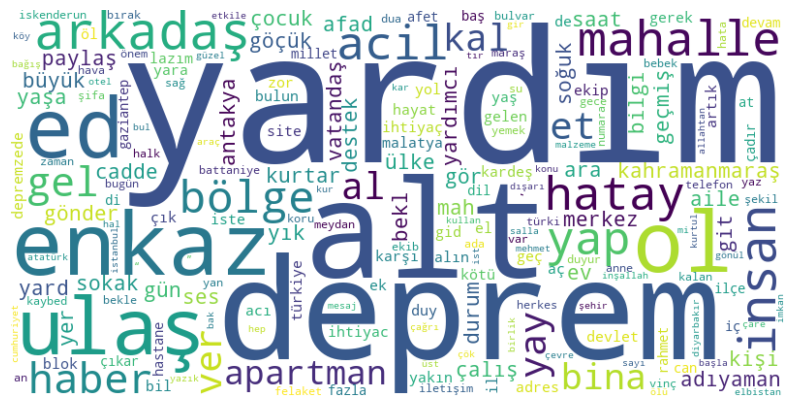

In [35]:
all_words = []
df_combined["content_wo_lemmatized"] = df_combined["content_wo_lemmatized"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
for text in df_combined["content_wo_lemmatized"]:
    all_words.extend(text)

word_counts = Counter(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.head()

timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan ≈ûevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ≈ûEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  ùêéÃàùê≥ùê†ùêÆÃàùê´ ùêëùêöùêß     dryghtn2  Feb 8, 2023   

                                             content  \
0  @haluklevent\n @oguzhanugur\n  hepinizden alla...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n@haluklevent\n @danlabilic\n and...   
3       tuƒüba s√∂dekoƒülu kovulsun \n@showtv\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                   content_ment_link  \
0  \n \n  hepinizden allah razƒ± olsun iyiki varsƒ±...   
1  allahƒ±m nolur sen onlara dayanma g√ºc√º ver #deprem   
2  replying to \n\n \n and \n_harun\nadƒ±yamanda a...   
3              tuƒüba s√∂dekoƒülu kovulsun \n\n #deprem   
4  arkada≈üimiza ula≈üamiyoruz\nkahramanmara≈ü elbis...   

                                    content_wo_punct  \
0       hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±...   
1   allahƒ±m nolur sen onlara dayanma g√ºc√º ver deprem   
2  replying to      and  harun adƒ±yamanda ali ta≈ü...   
3                 tuƒüba s√∂dekoƒülu kovulsun    deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                          content_wo_removed_english  \
0  hepinizden allah razƒ± olsun iyiki varsƒ±nƒ±z deprem   
1       allahƒ±m nolur onlara dayanma g√ºc√º ver deprem   
2   harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hic...   
3                    tuƒüba s√∂dekoƒülu kovulsun deprem   
4  arkada≈üimiza ula≈üamiyoruz kahramanmara≈ü elbist...   

                                content_wo_normalize  \
0  hepinizden allah razƒ± olsun iyi ki varsƒ±nƒ±z de...   
1     allahƒ±m ne olur onlara dayanma g√ºc√º ver deprem   
2  harun adƒ±yamanda ali ta≈üƒ± mahallesi sokak hicr...   
3                    tuƒüba sodekoƒülu kovulsun deprem   
4  arkada≈üƒ±mƒ±za ula≈üamƒ±yoruz kahramanmara≈ü elbist...   

                                 content_wo_tokenize  \
0  [hepinizden, allah, razƒ±, olsun, iyi, ki, vars...   
1  [allahƒ±m, ne, olur, onlara, dayanma, g√ºc√º, ver...   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                                     content_wo_stop  \
0               [hepinizden, razƒ±, varsƒ±nƒ±z, deprem]   
1               [onlara, dayanma, g√ºc√º, ver, deprem]   
2  [harun, adƒ±yamanda, ali, ta≈üƒ±, mahallesi, soka...   
3               [tuƒüba, sodekoƒülu, kovulsun, deprem]   
4  [arkada≈üƒ±mƒ±za, ula≈üamƒ±yoruz, kahramanmara≈ü, el...   

                               content_wo_lemmatized  \
0                           [hep, razƒ±, var, deprem]   
1                       [o, dayan, g√ºc, ver, deprem]   
2  [haru, adƒ±yaman, ali, ta≈üƒ±, mahalle, sokak, hi...   
3                    [tuƒüba, sodekoƒülu, kov, deprem]   
4  [arkada≈ü, ula≈ü, kahramanmara≈ü, elbistan, pƒ±nar...   

                               content_no_rare_words  
0                           [hep, razƒ±, var, deprem]  
1                       [o, dayan, g√ºc, ver, deprem]  
2  [adƒ±yaman, ali, ta≈üƒ±, mahalle, sokak, apartman...  
3                                           [deprem]  
4  [arkada≈ü, ula≈ü, kahramanmara≈ü, elbistan, mahal...

In [ ]:
df.to_csv('../results/TweetAnalyzeResult.csv', index=False)